In [1]:
import swan_vis as swan
import pandas as pd
import anndata
import numpy as np
from statsmodels.stats.multitest import multipletests
import scipy.stats as st

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
# 6/7/21 
# plotting tests

In [4]:
sg = swan.SwanGraph()
sg.add_transcriptome('../new_testing/files/test_full.gtf')
beep = sg.subset_on_gene('test2_gid')


Adding transcriptome to the SwanGraph


In [5]:
beep.loc_df

,chrom,coord,vertex_id,internal,TSS,TES
vertex_id,,,,,,
0,chr2,100,0,False,True,False
1,chr2,80,1,True,False,False
2,chr2,75,2,True,False,False
3,chr2,65,3,True,False,False
4,chr2,60,4,True,False,False
5,chr2,50,5,True,False,True
6,chr2,45,6,False,True,True



Adding transcriptome to the SwanGraph
             tname        gid        gname               path    tid  \
tid                                                                    
test1  test1_tname  test1_gid  test1_gname    [0, 1, 2, 3, 4]  test1   
test2  test2_tname  test2_gid  test2_gname    [5, 6, 7, 8, 9]  test2   
test3  test3_tname  test2_gid  test2_gname  [5, 6, 13, 14, 9]  test3   
test4  test4_tname  test4_gid  test4_gname               [10]  test4   
test5  test5_tname  test2_gid  test2_gname        [5, 11, 12]  test5   

                    loc_path  
tid                           
test1     [0, 1, 2, 3, 4, 5]  
test2  [12, 11, 10, 8, 7, 6]  
test3  [12, 11, 10, 9, 7, 6]  
test4                 [6, 7]  
test5         [12, 11, 8, 7]  
         v1  v2 strand edge_type  edge_id
edge_id                                  
0         0   1      +      exon        0
1         1   2      +    intron        1
2         2   3      +      exon        2
3         3   4      +    int

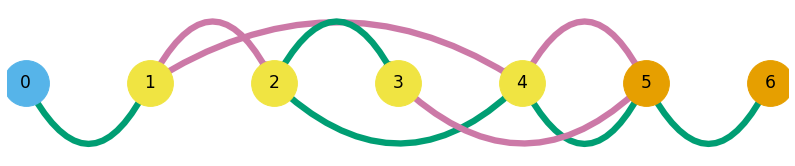

In [6]:
sg = swan.SwanGraph()
sg.add_transcriptome('../new_testing/files/test_full.gtf')
print(sg.t_df.head())
print(sg.edge_df)
print(sg.loc_df)
sg.plot_graph('test2_gid')
print()
print(sg.pg.edge_df)
print(sg.pg.loc_df)

In [7]:
sg.edge_df.loc[sg.edge_df.strand == '+']

,v1,v2,strand,edge_type,edge_id
0,0,1,+,exon,0
1,1,2,+,intron,1
2,2,3,+,exon,2
3,3,4,+,intron,3
4,4,5,+,exon,4
10,6,7,+,exon,10



Adding transcriptome to the SwanGraph
                         tname                    gid                  gname  \
tid                                                                            
ENSMUST00000020637.8  Canx-001  ENSMUSG00000020368.14  ENSMUSG00000020368.14   
ENSMUST00000146979.1  Canx-003  ENSMUSG00000020368.14  ENSMUSG00000020368.14   
ENSMUST00000153068.1  Canx-002  ENSMUSG00000020368.14  ENSMUSG00000020368.14   
ENSMUST00000155801.1  Canx-004  ENSMUSG00000020368.14  ENSMUSG00000020368.14   
ENSMUST00000179865.6  Canx-201  ENSMUSG00000020368.14  ENSMUSG00000020368.14   

                                                                   path  \
tid                                                                       
ENSMUST00000020637.8  [0, 29, 30, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1...   
ENSMUST00000146979.1               [32, 21, 22, 23, 24, 25, 26, 27, 33]   
ENSMUST00000153068.1                                       [34, 23, 35]   
ENSMUST00000155801.1     

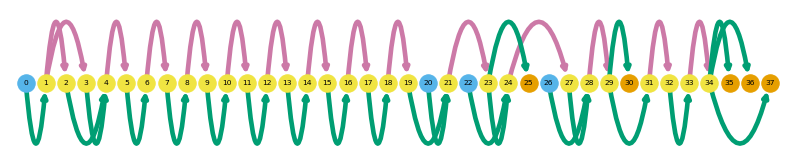

In [4]:
sg = swan.SwanGraph()
sg.add_transcriptome('../new_testing/files/Canx.gtf')
print(sg.t_df.head())
print(sg.edge_df.head())

sg.plot_graph('ENSMUSG00000020368.14')

In [4]:
# 6/4/21
# graph.py tests

In [11]:
# has_abundnace
sg = swan.SwanGraph()
obs = ['sample1']
var = ['gene1']
X = np.array([[0]])
sg.adata = anndata.AnnData(var=var, obs=obs, X=X)
print(sg.adata.obs.head())
print(sg.adata.var.head())
print(sg.adata.X)

         0
0  sample1
       0
0  gene1
[[0.]]


In [2]:
# 6/2/21
# graph.py tests

In [3]:
# dfs_to_dicts
sg = swan.SwanGraph()

# loc
data = [[0, 'chr3', 20],
     [1, 'chr1', 500],
     [2, 'chr1', 20]]
cols = ['vertex_id', 'chrom', 'coord']
sg.loc_df = pd.DataFrame(data=data, columns=cols)
sg.loc_df = swan.set_dupe_index(sg.loc_df, 'vertex_id')

# edge
data = [[0, 0, 1],
        [1, 1, 2],
        [2, 0, 2]]
cols = ['edge_id', 'v1', 'v2']
sg.edge_df = pd.DataFrame(data=data, columns=cols)
sg.edge_df = swan.set_dupe_index(sg.edge_df, 'edge_id')

# t
data = [[0, [0,1], [0,1,2]],
        [1, [2], [0,2]]]
cols = ['tid', 'path', 'loc_path']
sg.t_df = pd.DataFrame(data=data, columns=cols)
sg.t_df = swan.set_dupe_index(sg.t_df, 'tid')

print(sg.t_df)
print(sg.edge_df)
print(sg.loc_df)

       path   loc_path
tid                   
0    [0, 1]  [0, 1, 2]
1       [2]     [0, 2]
         v1  v2
edge_id        
0         0   1
1         1   2
2         0   2
          chrom  coord
vertex_id             
0          chr3     20
1          chr1    500
2          chr1     20


In [4]:
sg.dicts_to_dfs()

TypeError: 'numpy.ndarray' object is not callable

In [2]:
# 6/1/20
# todo - add get_loc_path checks etc - done
# todo - add find_ir_genes, find_es_genes - done

In [18]:
sg = swan.SwanGraph()
sg.annotation = True

# t_df
data = [[0, [0,1,2,3,4], True, 'g1', 't1'],
        [1, [0,5,4], False, 'g1', 't2']]
cols = ['vertex_id', 'path', 'annotation', 'gid', 'tid']
sg.t_df = pd.DataFrame(data=data, columns=cols)

# edge
data = [[0, 'exon', True, 0, 1],
        [1, 'intron', True, 1, 2],
        [2, 'exon', True, 2, 3],
        [3, 'intron', True, 3, 4],
        [4, 'exon', True, 4, 5],
        [5, 'intron', False, 1, 4]]
cols = ['edge_id', 'edge_type', 'annotation', 'v1', 'v2']
sg.edge_df = pd.DataFrame(data=data, columns=cols)

# loc
data = [0,1,2,3,4,5]
cols = ['vertex_id']
sg.loc_df = pd.DataFrame(data=data, columns=cols)

ctrl_gids = ['g1']
ctrl_tids = ['t2']
ctrl_edges = [5]

sg.get_loc_path()
sg.create_graph_from_dfs()

In [ ]:
"""
Finds all unique genes containing novel exon skipping events.
Requires that an annotation has been added to the SwanGraph.

Returns:
    es_genes (list of str): A list of gene ids from the SwanGraph with
        at least one novel exon skipping event
    es_transcripts (list of str): A list of transcript ids from the
        SwanGraph with at least one novel exon skipping event
    es_edges (list of tuples): A list of intronic edges in the
        SwanGraph that skip at least one exonic edge
"""

# get only novel edges
if 'annotation' not in sg.edge_df.columns:
    raise Exception('Cannot find novel IR events without '
        'annotation in SwanGraph.')

edge_ids = sg.edge_df.loc[ \
    (sg.edge_df.annotation == False)& \
    (sg.edge_df.edge_type == 'intron'), 'edge_id']
print('Analyzing {} intronic edges for ES'.format(len(edge_ids)))

# get subset of transcripts that are novel to look for ir edges in
nt_df = sg.t_df.loc[sg.t_df.annotation == False]

# for each edge, see if the subgraph between the edge vertices
# contains an exonic edge
es_edges = []
es_genes = []
es_transcripts = []
for eid in edge_ids:
    # subgraph consisting of all nodes between the candidate
    # exon-skipping edge coords in order and its edges
    entry = sg.edge_df.loc[eid]
    v1 = entry.v1
    v2 = entry.v2
    sub_nodes = [i for i in range(v1+1,v2)]
    sub_G = sg.G.subgraph(sub_nodes)
    sub_edges = list(sub_G.edges())
    sg.edge_df['tuple_edge_id'] = sg.edge_df[['v1', 'v2']].apply(tuple, axis=1)
    sub_edges = sg.edge_df.loc[sg.edge_df.tuple_edge_id.isin(sub_edges)]
    sg.edge_df.drop('tuple_edge_id', axis=1, inplace=True)

    # find edges that are exonic; if there are none, this is not
    # an exon-skipping edge
    sub_edges = sub_edges.loc[sub_edges.edge_type == 'exon']

    if len(sub_edges.index) > 0:

        # transcripts that contain the candidate exon-skipping edge
        skip_t_df = nt_df[[eid in path for path in nt_df.path.values.tolist()]]

        # circumvent the ISM bug
        if len(skip_t_df) == 0:
            continue

        # does at least one of the skipped exons belong
        # to the same gene as the skipping edge?
        else:
            # genes that contain the candidate exon-skipping edge
            skip_genes = skip_t_df.gid.values.tolist()
            skip_g_df = sg.t_df.loc[sg.t_df.gid.isin(skip_genes)]

            # check if the skipped edges are in one of the
            # exon-skipping genes (wow this is confusing)
            for gid in skip_genes:
                if gid in es_genes: continue
                for skip_eid in sub_edges.index:
                    # transcripts with the exons that are skipped
                    temp_df = cand_g_df[[skip_eid in path for path in cand_g_df.path.values.tolist()]]
                    tids = skip_t_df.tid.tolist()
                    if len(temp_df.index) > 0:
                        es_edges.append(eid)
                        es_genes.append(gid)
                        es_transcripts.extend(tids)

# drop tuple from edge_df
print(sg.edge_df.head())
sg.edge_df.drop('tuple_edge_id', axis=1, inplace=True)

es_genes = list(set(es_genes))
es_transcripts = list(set(es_transcripts))
es_edges = list(set(es_edges))

print('Found {} novel es events in {} transcripts.'.format(len(es_edges),
    len(es_transcripts)))

In [3]:
# fix find_ir_genes
sg = swan.SwanGraph()
sg.annotation = True

# t_df
data = [[0, [0,1,2], True, 'g1', 't1'],
        [1, [3], False, 'g1', 't2']]
cols = ['vertex_id', 'path', 'annotation', 'gid', 'tid']
sg.t_df = pd.DataFrame(data=data, columns=cols)

# edge
data = [[0, 'exon', True, 0, 1],
        [1, 'intron', True, 1, 2],
        [2, 'exon', True, 2, 3],
        [3, 'exon', False, 0, 3]]
cols = ['edge_id', 'edge_type', 'annotation', 'v1', 'v2']
sg.edge_df = pd.DataFrame(data=data, columns=cols)

# loc
data = [0,1,2,3]
cols = ['vertex_id']
sg.loc_df = pd.DataFrame(data=data, columns=cols)

ctrl_edges = [3]
ctrl_tids = ['t2']
ctrl_gids = ['g1']

sg.get_loc_path()
sg.create_graph_from_dfs()

In [17]:
"""
Finds all unique genes containing novel intron retention events.
Requires that an annotation has been added to the SwanGraph.

Returns:
    ir_genes (list of str): A list of gene ids from the SwanGraph with
        at least one novel intron retention event
    ir_transcripts (list of str): A list of transcript ids from the
        SwanGraph with at least one novel intron retention event
    ir_edges (list of tuples): A list of exonic edges in the
        SwanGraph that retain at least one intronic edge
"""

# get only novel edges
if 'annotation' not in sg.edge_df.columns:
    raise Exception('Cannot find novel IR events without '
        'annotation in SwanGraph.')

edge_ids = sg.edge_df.loc[ \
    (sg.edge_df.annotation == False)& \
    (sg.edge_df.edge_type == 'exon'), 'edge_id']
print('Analyzing {} exonic edges for IR'.format(len(edge_ids)))

# get subset of transcripts that are novel to look for ir edges in
nt_df = sg.t_df.loc[sg.t_df.annotation == False]

# for each edge, see if the subgraph between the edge vertices
# contains an exonic edge
ir_edges = []
ir_genes = []
ir_transcripts = []
for i, eid in enumerate(edge_ids):
    entry = sg.edge_df.loc[eid]
    v1 = entry.v1
    v2 = entry.v2
    sub_nodes = [i for i in range(v1+1,v2)]
    sub_G = sg.G.subgraph(sub_nodes)

    # need way to get this working, bc (v1,v2) ind does not work anymore
    sub_edges = list(sub_G.edges())
    sg.edge_df['tuple_edge_id'] = sg.edge_df[['v1', 'v2']].apply(tuple, axis=1)
    sub_edges = sg.edge_df.loc[sg.edge_df.tuple_edge_id.isin(sub_edges)]
    
    # find edges that are intronic; if there are none, this is not
    # an intron-retaining edge
    sub_edges = sub_edges.loc[sub_edges.edge_type == 'intron']

    if len(sub_edges.index) > 0:

        # transcripts that contain the exon-skipping edge
        cand_t_df = nt_df[[eid in path for path in nt_df.path.values.tolist()]]

        # circumvent the ISM bug
        if len(cand_t_df) == 0:
            continue

        # does at least one of the retained introns belong
        # to the same gene as the retaining edge?
        else:
            # genes that contain the intron-retaining edge edge
            cand_genes = cand_t_df.gid.values.tolist()
            cand_g_df = sg.t_df.loc[sg.t_df.gid.isin(cand_genes)]

            # check if the retained edges are in one of the
            # intron-retaining genes (wow this is confusing)
            for gid in cand_genes:
                if gid in ir_genes: continue
                for cand_eid in sub_edges.index:
                    temp_df = cand_g_df[[cand_eid in path for path in cand_g_df.path.values.tolist()]]
                    tids = cand_t_df.tid.tolist()
                    if len(temp_df.index) > 0:
                        ir_edges.append(eid)
                        ir_genes.append(gid)
                        ir_transcripts.extend(tids)

ir_genes = list(set(ir_genes))
ir_transcripts = list(set(ir_transcripts))
ir_edges = list(set(ir_edges))

print('Found {} novel ir events from {} transcripts.'.format(len(ir_genes),
    len(ir_transcripts)))

Analyzing 1 exonic edges for IR
Found 1 novel ir events from 1 transcripts.


In [15]:
print(ir_genes)
print(ir_transcripts)
print(ir_edges)

['g1']
['t2']
[3]


In [11]:
nt_df.path.values.tolist()

[[3]]

In [17]:
sg = swan.SwanGraph()
sg.add_transcriptome('../new_testing/files/test_full.gtf')

print(sg.t_df.head())
print(sg.edge_df.head())
print(sg.loc_df)


Adding transcriptome to the SwanGraph
             tname        gid        gname               path    tid
test1  test1_tname  test1_gid  test1_gname    [0, 1, 2, 3, 4]  test1
test2  test2_tname  test2_gid  test2_gname    [5, 6, 7, 8, 9]  test2
test4  test4_tname  test4_gid  test4_gname               [10]  test4
test5  test5_tname  test2_gid  test2_gname        [5, 11, 12]  test5
test3  test3_tname  test2_gid  test2_gname  [5, 6, 13, 14, 9]  test3
  v1 v2 strand edge_type edge_id
0  0  1      +      exon       0
1  1  4      +    intron       1
2  4  5      +      exon       2
3  5  2      +    intron       3
4  2  3      +      exon       4
   chrom coord vertex_id
0   chr1     1         0
1   chr1    20         1
2   chr1    35         2
3   chr1    40         3
4   chr1    25         4
5   chr1    30         5
6   chr2   100         6
7   chr2    80         7
8   chr2    50         8
9   chr2    45         9
10  chr2    75        10
11  chr2    60        11
12  chr2    65        12

In [18]:
def get_transcript_loc_path(path, edge_df):
    start_v1 = [edge_df.loc[path[0], 'v1']]
    v2s = edge_df.loc[path, 'v2'].tolist()
    loc_path = start_v1+v2s
    return loc_path

sg.t_df['loc_path'] = sg.t_df.apply(lambda x: \
    get_transcript_loc_path(x.path, sg.edge_df), axis=1)

In [20]:
sg.t_df.head()

,tname,gid,gname,path,tid,loc_path
test1,test1_tname,test1_gid,test1_gname,"[0, 1, 2, 3, 4]",test1,"[0, 1, 4, 5, 2, 3]"
test2,test2_tname,test2_gid,test2_gname,"[5, 6, 7, 8, 9]",test2,"[6, 7, 10, 11, 8, 9]"
test4,test4_tname,test4_gid,test4_gname,[10],test4,"[9, 8]"
test5,test5_tname,test2_gid,test2_gname,"[5, 11, 12]",test5,"[6, 7, 11, 8]"
test3,test3_tname,test2_gid,test2_gname,"[5, 6, 13, 14, 9]",test3,"[6, 7, 10, 12, 8, 9]"


In [16]:
path = [0, 1, 2, 3, 4]
start_v1 = [sg.edge_df.loc[path[0], 'v1']]
v2s = sg.edge_df.loc[path, 'v2'].tolist()
loc_path = start_v1+v2s

print(loc_path)

[0, 1, 4, 5, 2, 3]


In [ ]:
sg['loc_path']

In [6]:
sg = swan.SwanGraph()
sg.add_transcriptome('../new_testing/files/test_novel.gtf')
sg.add_annotation('../new_testing/files/test_known.gtf')
# sg.add_transcriptome('../new_testing/files/test_novel.gtf')

edge_df = sg.add_edge_coords()


Adding transcriptome to the SwanGraph

Adding annotation to the SwanGraph


In [7]:
sg.t_df

,tname,gid,gname,path,tid
test4,test4_tname,test2_gid,test2_gname,"[0, 1, 2, 3, 4]",test4
test5,test5_tname,test2_gid,test2_gname,"[0, 5, 6]",test5
test3,test3_tname,test2_gid,test2_gname,"[0, 1, 7, 8, 4]",test3
test1,test1_tname,test1_gid,test1_gname,"[9, 10, 11, 12, 13]",test1
test2,test2_tname,test2_gid,test2_gname,"[0, 1, 7, 8, 4]",test2


In [8]:
edge_df

,v1,v2,strand,edge_type,edge_id,chrom,v1_coord,vertex_id_x,v2_coord,vertex_id_y
0,0,1,-,exon,0,chr2,100,0,80,1
1,1,4,-,intron,1,chr2,80,1,75,4
2,4,5,-,exon,2,chr2,75,4,65,5
3,5,2,-,intron,3,chr2,65,5,50,2
4,2,3,-,exon,4,chr2,50,2,45,3
5,1,6,-,intron,5,chr2,80,1,60,6
6,6,2,-,exon,6,chr2,60,6,50,2
7,4,6,-,exon,7,chr2,75,4,60,6
8,6,2,-,intron,8,chr2,60,6,50,2
9,7,8,+,exon,9,chr1,1,7,20,8


In [9]:
sg.loc_df

,chrom,coord,vertex_id
0,chr2,100,0
1,chr2,80,1
2,chr2,50,2
3,chr2,45,3
4,chr2,75,4
5,chr2,65,5
6,chr2,60,6
7,chr1,1,7
8,chr1,20,8
9,chr1,35,9


#### test - create_dfs - swangraph with data, duplicate transcript being added
* also tests that old data (novelty in this case) is not overwritten

In [4]:
transcripts, exons = get_test_transcript_exon_dicts()
sg = swan.SwanGraph()

# add dummy data

# loc_df - format
loc_df = pd.read_csv('data/test_preexisting_loc_df.tsv', sep='\t')
loc_df.set_index('vertex_id_index', inplace=True)
loc_df.index.name = 'vertex_id'

# edge_df - format and remove the columns that are there 
# just for debugging purposes
edge_df = pd.read_csv('data/test_preexisting_edge_df.tsv', sep='\t')
edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
edge_df.set_index('edge_id_index', inplace=True)
edge_df.index.name = 'edge_id'

# t_df - remove and reformat columns that are there for debugging
t_df = pd.read_csv('data/test_preexisting_t_df.tsv', sep='\t')
t_df.set_index('tid_index', inplace=True)
t_df.index.name = 'tid'
t_df.drop(['loc_path'], axis=1, inplace=True)
t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
t_df['path'] = t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
t_df = t_df[t_df.columns]

sg.loc_df = loc_df
sg.edge_df = edge_df
sg.t_df = t_df

loc_df, edge_df, t_df = sg.create_dfs(transcripts, exons, False)


# control data

# loc_df - format
ctrl_loc_df = pd.read_csv('data/test_preexisting_result_loc_df.tsv', sep='\t')
ctrl_loc_df.set_index('vertex_id_index', inplace=True)
ctrl_loc_df.index.name = 'vertex_id'

# edge_df - format and remove the columns that are there 
# just for debugging purposes
ctrl_edge_df = pd.read_csv('data/test_preexisting_result_edge_df.tsv', sep='\t')
ctrl_edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
ctrl_edge_df.set_index('edge_id_index', inplace=True)
ctrl_edge_df.index.name = 'edge_id'

# t_df - remove and reformat columns that are there for debugging
ctrl_t_df = pd.read_csv('data/test_preexisting_result_t_df.tsv', sep='\t')
ctrl_t_df.set_index('tid_index', inplace=True)
ctrl_t_df.index.name = 'tid'
ctrl_t_df.drop(['loc_path'], axis=1, inplace=True)
ctrl_t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
ctrl_t_df['path'] = ctrl_t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
ctrl_t_df = ctrl_t_df[t_df.columns]

# remove novelty for entries that are new 
new_tids = ['test1', 'test3', 'test4', 'test5']
ctrl_t_df.loc[ctrl_t_df.tid.isin(new_tids), 'novelty'] = 'Undefined'

# sort all values by their IDs
loc_df.sort_index(inplace=True)
edge_df.sort_index(inplace=True)
t_df.sort_index(inplace=True)
ctrl_loc_df.sort_index(inplace=True)
ctrl_edge_df.sort_index(inplace=True)
ctrl_t_df.sort_index(inplace=True)

# bc I'm dumb, convert to integers
loc_df.coord = loc_df.coord.astype('int')

# print('test')
# print(loc_df)
# print('control')
# print(ctrl_loc_df)
print(ctrl_loc_df == loc_df)

# print('test')
# print(edge_df)
# print('control')
# print(ctrl_edge_df)
print(ctrl_edge_df == edge_df)

# print('test')
# print(t_df)
# print('control')
# print(ctrl_t_df)
print(ctrl_t_df == t_df)

# test_paths = t_df.path.tolist()
# ctrl_paths = ctrl_t_df.path.tolist()
# for t, c in zip(test_paths, ctrl_paths):
#     pass

           chrom  coord  vertex_id
vertex_id                         
0           True   True       True
1           True   True       True
2           True   True       True
3           True   True       True
4           True   True       True
5           True   True       True
6           True   True       True
7           True   True       True
8           True   True       True
9           True   True       True
10          True   True       True
11          True   True       True
12          True   True       True
           v1    v2  strand  edge_type  edge_id
edge_id                                        
0        True  True    True       True     True
1        True  True    True       True     True
2        True  True    True       True     True
3        True  True    True       True     True
4        True  True    True       True     True
5        True  True    True       True     True
6        True  True    True       True     True
7        True  True    True       True     

#### test - create_dfs - swangraph with data, mixed novelty content

In [4]:
transcripts, exons = get_test_transcript_exon_dicts()

# to do - remove transcript that's already there
sg = swan.SwanGraph()

# add dummy data

# loc_df - format
loc_df = pd.read_csv('data/test_preexisting_loc_df.tsv', sep='\t')
loc_df.set_index('vertex_id_index', inplace=True)
loc_df.index.name = 'vertex_id'

# edge_df - format and remove the columns that are there 
# just for debugging purposes
edge_df = pd.read_csv('data/test_preexisting_edge_df.tsv', sep='\t')
edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
edge_df.set_index('edge_id_index', inplace=True)
edge_df.index.name = 'edge_id'

# t_df - remove and reformat columns that are there for debugging
t_df = pd.read_csv('data/test_preexisting_t_df.tsv', sep='\t')
t_df.set_index('tid_index', inplace=True)
t_df.index.name = 'tid'
t_df.drop(['loc_path'], axis=1, inplace=True)
t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
t_df['path'] = t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
t_df = t_df[t_df.columns]

sg.loc_df = loc_df
sg.edge_df = edge_df
sg.t_df = t_df

loc_df, edge_df, t_df = sg.create_dfs(transcripts, exons, False)


# control data

# loc_df - format
ctrl_loc_df = pd.read_csv('data/test_preexisting_result_loc_df.tsv', sep='\t')
ctrl_loc_df.set_index('vertex_id_index', inplace=True)
ctrl_loc_df.index.name = 'vertex_id'

# edge_df - format and remove the columns that are there 
# just for debugging purposes
ctrl_edge_df = pd.read_csv('data/test_preexisting_result_edge_df.tsv', sep='\t')
ctrl_edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
ctrl_edge_df.set_index('edge_id_index', inplace=True)
ctrl_edge_df.index.name = 'edge_id'

# t_df - remove and reformat columns that are there for debugging
ctrl_t_df = pd.read_csv('data/test_preexisting_result_t_df.tsv', sep='\t')
ctrl_t_df.set_index('tid_index', inplace=True)
ctrl_t_df.index.name = 'tid'
ctrl_t_df.drop(['loc_path'], axis=1, inplace=True)
ctrl_t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
ctrl_t_df['path'] = ctrl_t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
ctrl_t_df = ctrl_t_df[t_df.columns]

# remove novelty for entries that are new 
new_tids = ['test1', 'test3', 'test4', 'test5']
ctrl_t_df.loc[ctrl_t_df.tid.isin(new_tids), 'novelty'] = 'Undefined'

# sort all values by their IDs
loc_df.sort_index(inplace=True)
edge_df.sort_index(inplace=True)
t_df.sort_index(inplace=True)
ctrl_loc_df.sort_index(inplace=True)
ctrl_edge_df.sort_index(inplace=True)
ctrl_t_df.sort_index(inplace=True)

# bc I'm dumb, convert to integers
loc_df.coord = loc_df.coord.astype('int')

# print('test')
# print(loc_df)
# print('control')
# print(ctrl_loc_df)
print(ctrl_loc_df == loc_df)

# print('test')
# print(edge_df)
# print('control')
# print(ctrl_edge_df)
print(ctrl_edge_df == edge_df)

# print('test')
# print(t_df)
# print('control')
# print(ctrl_t_df)
print(ctrl_t_df == t_df)

# test_paths = t_df.path.tolist()
# ctrl_paths = ctrl_t_df.path.tolist()
# for t, c in zip(test_paths, ctrl_paths):
#     pass

           chrom  coord  vertex_id
vertex_id                         
0           True   True       True
1           True   True       True
2           True   True       True
3           True   True       True
4           True   True       True
5           True   True       True
6           True   True       True
7           True   True       True
8           True   True       True
9           True   True       True
10          True   True       True
11          True   True       True
12          True   True       True
           v1    v2  strand  edge_type  edge_id
edge_id                                        
0        True  True    True       True     True
1        True  True    True       True     True
2        True  True    True       True     True
3        True  True    True       True     True
4        True  True    True       True     True
5        True  True    True       True     True
6        True  True    True       True     True
7        True  True    True       True     

#### test - create_dfs - swangraph with data

In [13]:
transcripts, exons = get_test_transcript_exon_dicts()

# to do - remove transcript that's already there
del transcripts['test2']
sg = swan.SwanGraph()

# add dummy data

# loc_df - format
loc_df = pd.read_csv('data/test_preexisting_loc_df.tsv', sep='\t')
loc_df.set_index('vertex_id_index', inplace=True)
loc_df.index.name = 'vertex_id'

# edge_df - format and remove the columns that are there 
# just for debugging purposes
edge_df = pd.read_csv('data/test_preexisting_edge_df.tsv', sep='\t')
edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
edge_df.set_index('edge_id_index', inplace=True)
edge_df.index.name = 'edge_id'

# t_df - remove and reformat columns that are there for debugging
t_df = pd.read_csv('data/test_preexisting_t_df.tsv', sep='\t')
t_df.set_index('tid_index', inplace=True)
t_df.index.name = 'tid'
t_df.drop(['loc_path'], axis=1, inplace=True)
t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
t_df['path'] = t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
t_df = t_df[t_df.columns]

sg.loc_df = loc_df
sg.edge_df = edge_df
sg.t_df = t_df

loc_df, edge_df, t_df = sg.create_dfs(transcripts, exons, True)


# control data

# loc_df - format
ctrl_loc_df = pd.read_csv('data/test_preexisting_result_loc_df.tsv', sep='\t')
ctrl_loc_df.set_index('vertex_id_index', inplace=True)
ctrl_loc_df.index.name = 'vertex_id'

# edge_df - format and remove the columns that are there 
# just for debugging purposes
ctrl_edge_df = pd.read_csv('data/test_preexisting_result_edge_df.tsv', sep='\t')
ctrl_edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
ctrl_edge_df.set_index('edge_id_index', inplace=True)
ctrl_edge_df.index.name = 'edge_id'

# t_df - remove and reformat columns that are there for debugging
ctrl_t_df = pd.read_csv('data/test_preexisting_result_t_df.tsv', sep='\t')
ctrl_t_df.set_index('tid_index', inplace=True)
ctrl_t_df.index.name = 'tid'
ctrl_t_df.drop(['loc_path'], axis=1, inplace=True)
ctrl_t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
ctrl_t_df['path'] = ctrl_t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
ctrl_t_df = ctrl_t_df[t_df.columns]

# sort all values by their IDs
loc_df.sort_index(inplace=True)
edge_df.sort_index(inplace=True)
t_df.sort_index(inplace=True)
ctrl_loc_df.sort_index(inplace=True)
ctrl_edge_df.sort_index(inplace=True)
ctrl_t_df.sort_index(inplace=True)

# and order columns the same way
ctrl_loc_df = ctrl_loc_df[loc_df.columns]
ctrl_edge_df = ctrl_edge_df[edge_df.columns]
ctrl_t_df = ctrl_t_df[t_df.columns]

# bc I'm dumb, convert to integers
loc_df.coord = loc_df.coord.astype('int')

# print('test')
# print(loc_df)
# print('control')
# print(ctrl_loc_df)
print(ctrl_loc_df == loc_df)

# print('test')
# print(edge_df)
# print('control')
# print(ctrl_edge_df)
print(ctrl_edge_df == edge_df)

# print('test')
# print(t_df)
# print('control')
# print(ctrl_t_df)
print(ctrl_t_df == t_df)

# test_paths = t_df.path.tolist()
# ctrl_paths = ctrl_t_df.path.tolist()
# for t, c in zip(test_paths, ctrl_paths):
#     pass

           chrom  coord  vertex_id
vertex_id                         
0           True   True       True
1           True   True       True
2           True   True       True
3           True   True       True
4           True   True       True
5           True   True       True
6           True   True       True
7           True   True       True
8           True   True       True
9           True   True       True
10          True   True       True
11          True   True       True
12          True   True       True
           v1    v2  strand  edge_type  edge_id
edge_id                                        
0        True  True    True       True     True
1        True  True    True       True     True
2        True  True    True       True     True
3        True  True    True       True     True
4        True  True    True       True     True
5        True  True    True       True     True
6        True  True    True       True     True
7        True  True    True       True     

#### test - create_dfs - from_talon = True

In [12]:
transcripts, exons = get_test_transcript_exon_dicts()
sg = swan.SwanGraph()

loc_df, edge_df, t_df = sg.create_dfs(transcripts, exons, True)

ctrl_loc_df = pd.read_csv('data/test_loc_df.tsv', sep='\t')
ctrl_loc_df.set_index('vertex_id_index', inplace=True)
ctrl_loc_df.index.name = 'vertex_id'

# remove the columns that are there just for debugging purposes
ctrl_edge_df = pd.read_csv('data/test_edge_df.tsv', sep='\t')
ctrl_edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
ctrl_edge_df.set_index('edge_id_index', inplace=True)
ctrl_edge_df.index.name = 'edge_id'

# again, remove and reformat columns that are there for debugging
ctrl_t_df = pd.read_csv('data/test_t_df.tsv', sep='\t')
ctrl_t_df.set_index('tid_index', inplace=True)
ctrl_t_df.index.name = 'tid'
ctrl_t_df.drop(['loc_path'], axis=1, inplace=True)
ctrl_t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
ctrl_t_df['path'] = ctrl_t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)
ctrl_t_df = ctrl_t_df[t_df.columns]

# sort all values by their IDs
loc_df.sort_index(inplace=True)
edge_df.sort_index(inplace=True)
t_df.sort_index(inplace=True)
ctrl_loc_df.sort_index(inplace=True)
ctrl_edge_df.sort_index(inplace=True)
ctrl_t_df.sort_index(inplace=True)

# and order columns the same way
ctrl_loc_df = ctrl_loc_df[loc_df.columns]
ctrl_edge_df = ctrl_edge_df[edge_df.columns]
ctrl_t_df = ctrl_t_df[t_df.columns]


# bc I'm dumb, convert to integers
loc_df.coord = loc_df.coord.astype('int')

# print('test')
# print(loc_df)
# print('control')
# print(ctrl_loc_df)
print(ctrl_loc_df == loc_df)

# print('test')
# print(edge_df)
# print('control')
# print(ctrl_edge_df)
print(ctrl_edge_df == edge_df)

# print('test')
# print(t_df)
# print('control')
# print(ctrl_t_df)
print(ctrl_t_df == t_df)

# test_paths = t_df.path.tolist()
# ctrl_paths = ctrl_t_df.path.tolist()
# for t, c in zip(test_paths, ctrl_paths):
#     pass

           chrom  coord  vertex_id
vertex_id                         
0           True   True       True
1           True   True       True
2           True   True       True
3           True   True       True
4           True   True       True
5           True   True       True
6           True   True       True
7           True   True       True
8           True   True       True
9           True   True       True
10          True   True       True
11          True   True       True
12          True   True       True
           v1    v2  strand  edge_type  edge_id
edge_id                                        
0        True  True    True       True     True
1        True  True    True       True     True
2        True  True    True       True     True
3        True  True    True       True     True
4        True  True    True       True     True
5        True  True    True       True     True
6        True  True    True       True     True
7        True  True    True       True     

#### test - create_dfs - empty swangraph
* make sure that the emtpy dict -> df -> dict conversion doesn't screw up

In [3]:
transcripts, exons = get_test_transcript_exon_dicts()
sg = swan.SwanGraph()

loc_df, edge_df, t_df = sg.create_dfs(transcripts, exons, False)

ctrl_loc_df = pd.read_csv('data/test_loc_df.tsv', sep='\t')
ctrl_loc_df.set_index('vertex_id_index', inplace=True)
ctrl_loc_df.index.name = 'vertex_id'

# remove the columns that are there just for debugging purposes
ctrl_edge_df = pd.read_csv('data/test_edge_df.tsv', sep='\t')
ctrl_edge_df.drop(['v2_coord', 'v1_coord'], axis=1, inplace=True)
ctrl_edge_df.set_index('edge_id_index', inplace=True)
ctrl_edge_df.index.name = 'edge_id'

# again, remove and reformat columns that are there for debugging
ctrl_t_df = pd.read_csv('data/test_t_df.tsv', sep='\t')
ctrl_t_df.set_index('tid_index', inplace=True)
ctrl_t_df.index.name = 'tid'
ctrl_t_df.drop(['loc_path', 'novelty'], axis=1, inplace=True)
ctrl_t_df.rename({'edge_path': 'path'}, axis=1, inplace=True)
ctrl_t_df['path'] = ctrl_t_df.apply(lambda x: [int(n) for n in x.path.split(',')], axis=1)

# sort all values by their IDs
loc_df.sort_index(inplace=True)
edge_df.sort_index(inplace=True)
t_df.sort_index(inplace=True)
ctrl_loc_df.sort_index(inplace=True)
ctrl_edge_df.sort_index(inplace=True)
ctrl_t_df.sort_index(inplace=True)

# and order columns the same way
ctrl_loc_df = ctrl_loc_df[loc_df.columns]
ctrl_edge_df = ctrl_edge_df[edge_df.columns]
ctrl_t_df = ctrl_t_df[t_df.columns]

# bc I'm dumb, convert to integers
loc_df.coord = loc_df.coord.astype('int')

# print('test')
# print(loc_df)
# print('control')
# print(ctrl_loc_df)
print(ctrl_loc_df == loc_df)

# print('test')
# print(edge_df)
# print('control')
# print(ctrl_edge_df)
print(ctrl_edge_df == edge_df)

# print('test')
# print(t_df)
# print('control')
# print(ctrl_t_df)
print(ctrl_t_df == t_df)

# test_paths = t_df.path.tolist()
# ctrl_paths = ctrl_t_df.path.tolist()
# for t, c in zip(test_paths, ctrl_paths):
#     pass

           chrom  coord  vertex_id
vertex_id                         
0           True   True       True
1           True   True       True
2           True   True       True
3           True   True       True
4           True   True       True
5           True   True       True
6           True   True       True
7           True   True       True
8           True   True       True
9           True   True       True
10          True   True       True
11          True   True       True
12          True   True       True
           v1    v2  strand  edge_type  edge_id
edge_id                                        
0        True  True    True       True     True
1        True  True    True       True     True
2        True  True    True       True     True
3        True  True    True       True     True
4        True  True    True       True     True
5        True  True    True       True     True
6        True  True    True       True     True
7        True  True    True       True     

#### test - create_transcript_edge_dict - transcripts already exist in swangraph

In [ ]:
# TODO

#### test - create_transcript_edge_dict - edges already exist in swangraph

In [8]:
transcripts, exons = get_test_transcript_exon_dicts()

# add some dummy data
sg = swan.SwanGraph()

data = [[0, 'chr1', 1],
        [1, 'chr2', 20], 
        [2, 'chr2', 100],
        [3, 'chr2', 80]]
columns = ['vertex_id', 'chrom', 'coord']
sg.loc_df = pd.DataFrame(data=data, columns=columns)
locs = sg.create_loc_dict(exons)

data = [[0, 0, 1, '+', 'exon'],
        [1, 2, 3, '-', 'exon']]
columns = ['edge_id', 'v1', 'v2', 'strand', 'edge_type']
sg.edge_df = pd.DataFrame(data=data, columns=columns)

transcripts, edges = sg.create_transcript_edge_dicts(transcripts, exons, locs)

# just compare the paths for the transcripts, which is the only 
# part modified by this function
transcripts = dict([(key, item['path']) for key, item in transcripts.items()])
ctrl_transcript_paths = {
    'test1': [0,2,3,4,5],
    'test2': [1,6,7,8,9],
    'test3': [1,6,10,11,9],
    'test4': [12],
    'test5': [1,13,14]
}

print(transcripts == ctrl_transcript_paths)

ctrl_edges = {
    ('chr1', 1, 20, '+', 'exon'): {
        'edge_id': 0,
        'edge_type': 'exon',
        'v1': 0,
        'v2': 1
    },
    ('chr1', 20, 25, '+', 'intron'): {
        'edge_id': 2,
        'edge_type': 'intron',
        'v1': 4,
        'v2': 5
    },
    ('chr1', 25, 30, '+', 'exon'): {
        'edge_id': 3,
        'edge_type': 'exon', 
        'v1': 5,
        'v2': 6
    },
    ('chr1', 30, 35, '+', 'intron'): {
        'edge_id': 4,
        'edge_type': 'intron', 
        'v1': 6,
        'v2': 7
    },
    ('chr1', 35, 40, '+', 'exon'): {
        'edge_id': 5,
        'edge_type': 'exon', 
        'v1': 7,
        'v2': 8
    },
    ('chr2', 100, 80, '-', 'exon'): {
        'edge_id': 1,
        'edge_type': 'exon', 
        'v1': 2,
        'v2': 3
    },
    ('chr2', 80, 75, '-', 'intron'): {
        'edge_id': 6,
        'edge_type': 'intron', 
        'v1': 3,
        'v2': 9
    },
    ('chr2', 75, 60, '-', 'exon'): {
        'edge_id': 7,
        'edge_type': 'exon' , 
        'v1': 9,
        'v2': 10
    },
    ('chr2', 60, 50, '-', 'intron'): {
        'edge_id': 8,
        'edge_type': 'intron', 
        'v1': 10,
        'v2': 11
    },
    ('chr2', 50, 45, '-', 'exon'): {
        'edge_id': 9,
        'edge_type': 'exon', 
        'v1': 11,
        'v2': 12
    },
    ('chr2', 75, 65, '-', 'exon'): {
        'edge_id': 10,
        'edge_type': 'exon', 
        'v1': 9,
        'v2': 13
    },
    ('chr2', 65, 50, '-', 'intron'): {
        'edge_id': 11,
        'edge_type': 'intron', 
        'v1': 13,
        'v2': 11
    },
    ('chr2', 45, 50, '+', 'exon'): {
        'edge_id': 12,
        'edge_type': 'exon', 
        'v1': 12,
        'v2': 11
    },
    ('chr2', 80, 60, '-', 'intron'): {
        'edge_id': 13,
        'edge_type': 'intron', 
        'v1': 3,
        'v2': 10
    },
    ('chr2', 60, 50, '-', 'exon'): {
        'edge_id': 14,
        'edge_type': 'exon', 
        'v1': 10,
        'v2': 11
    }
}

print(edges == ctrl_edges)

# print(locs)
# for key, _ in edges.items():
#     print()
#     print(key)
#     print('test item')
#     print(edges[key])
#     print('ctrl item')
#     print(ctrl_edges[key])

True
True


#### test - create_transcript_edge_dict - empty swangraph

In [7]:
transcripts, exons = get_test_transcript_exon_dicts()

sg = swan.SwanGraph()
locs = sg.create_loc_dict(exons)

transcripts, edges = sg.create_transcript_edge_dicts(transcripts, exons, locs)

# just compare the paths for the transcripts, which is the only 
# part modified by this function
transcripts = dict([(key, item['path']) for key, item in transcripts.items()])
ctrl_transcript_paths = {
    'test1': [0,1,2,3,4],
    'test2': [5,6,7,8,9],
    'test3': [5,6,10,11,9],
    'test4': [12],
    'test5': [5,13,14]
}

print(transcripts == ctrl_transcript_paths)

ctrl_edges = {
    ('chr1', 1, 20, '+', 'exon'): {
        'edge_id': 0,
        'edge_type': 'exon',
        'v1': 0,
        'v2': 1
    },
    ('chr1', 20, 25, '+', 'intron'): {
        'edge_id': 1,
        'edge_type': 'intron',
        'v1': 1,
        'v2': 2
    },
    ('chr1', 25, 30, '+', 'exon'): {
        'edge_id': 2,
        'edge_type': 'exon', 
        'v1': 2,
        'v2': 3
    },
    ('chr1', 30, 35, '+', 'intron'): {
        'edge_id': 3,
        'edge_type': 'intron', 
        'v1': 3,
        'v2': 4
    },
    ('chr1', 35, 40, '+', 'exon'): {
        'edge_id': 4,
        'edge_type': 'exon', 
        'v1': 4,
        'v2': 5
    },
    ('chr2', 100, 80, '-', 'exon'): {
        'edge_id': 5,
        'edge_type': 'exon', 
        'v1': 6,
        'v2': 7
    },
    ('chr2', 80, 75, '-', 'intron'): {
        'edge_id': 6,
        'edge_type': 'intron', 
        'v1': 7,
        'v2': 8
    },
    ('chr2', 75, 60, '-', 'exon'): {
        'edge_id': 7,
        'edge_type': 'exon' , 
        'v1': 8,
        'v2': 9
    },
    ('chr2', 60, 50, '-', 'intron'): {
        'edge_id': 8,
        'edge_type': 'intron', 
        'v1': 9,
        'v2': 10
    },
    ('chr2', 50, 45, '-', 'exon'): {
        'edge_id': 9,
        'edge_type': 'exon', 
        'v1': 10,
        'v2': 11
    },
    ('chr2', 75, 65, '-', 'exon'): {
        'edge_id': 10,
        'edge_type': 'exon', 
        'v1': 8,
        'v2': 12
    },
    ('chr2', 65, 50, '-', 'intron'): {
        'edge_id': 11,
        'edge_type': 'intron', 
        'v1': 12,
        'v2': 10
    },
    ('chr2', 45, 50, '+', 'exon'): {
        'edge_id': 12,
        'edge_type': 'exon', 
        'v1': 11,
        'v2': 10
    },
    ('chr2', 80, 60, '-', 'intron'): {
        'edge_id': 13,
        'edge_type': 'intron', 
        'v1': 7,
        'v2': 9
    },
    ('chr2', 60, 50, '-', 'exon'): {
        'edge_id': 14,
        'edge_type': 'exon', 
        'v1': 9,
        'v2': 10
    }
}

print(edges == ctrl_edges)

True
True


#### test - create_loc_dict - locs already exist in swangraph

In [6]:
_, exons = get_test_transcript_exon_dicts()

# dummy preexisting data
sg = swan.SwanGraph()
data = [[0, 'chr1', 1], [1, 'chr2', 80]]
columns = ['vertex_id', 'chrom', 'coord']
sg.loc_df = pd.DataFrame(data=data, columns=columns)

locs = sg.create_loc_dict(exons)

ctrl_locs = {('chr1', 1):0,
    ('chr2', 80): 1,
    ('chr1', 20): 2,
    ('chr1', 25): 3,
    ('chr1', 30): 4,
    ('chr1', 35): 5,
    ('chr1', 40): 6,
    ('chr2', 100): 7,
    ('chr2', 75): 8,
    ('chr2', 60): 9,
    ('chr2', 50): 10,
    ('chr2', 45): 11,
    ('chr2', 65): 12
     }

print(ctrl_locs == locs)

True


#### test - create_loc_dict - empty swangraph
* also checks to make sure that exons with the same location as one of their splice sites aren't duplicated

In [5]:
_, exons = get_test_transcript_exon_dicts()

sg = swan.SwanGraph()
locs = sg.create_loc_dict(exons)
ctrl_locs = {('chr1',1): 0, 
    ('chr1', 20): 1,
    ('chr1', 25): 2,
    ('chr1', 30): 3,
    ('chr1', 35): 4,
    ('chr1', 40): 5,
    ('chr2', 100): 6,
    ('chr2', 80): 7,
    ('chr2', 75): 8,
    ('chr2', 60): 9,
    ('chr2', 50): 10,
    ('chr2', 45): 11,
    ('chr2', 65): 12
     }
print(ctrl_locs == locs)

True


In [4]:
def get_test_transcript_exon_dicts():

    # features: 
    # exons that are "out of order"
    # two transcripts from the same gene
    # transcripts from - strand
    # transcripts from + strand
    transcripts = {
        'test1': { # + strand
            'gid': 'test1_gid',
            'gname': 'test1_gname',
            'tid': 'test1',
            'tname': 'test1_tname',
            'strand': '+',
            'novelty': 'Known',
            'exons': ['chr1_1_20_+_exon',
                      'chr1_35_40_+_exon', # out of order exon (+)
                      'chr1_25_30_+_exon',] # out of order exon (+)
        },
        'test2': { # - strand
            'gid': 'test2_gid',
            'gname': 'test2_gname',
            'tid': 'test2',
            'tname': 'test2_tname',
            'strand': '-', 
            'novelty': 'Known',
            'exons': ['chr2_100_80_-_exon', # duplicated exon/locations
                      'chr2_75_60_-_exon', # same edge but intron vs. exon
                      'chr2_50_45_-_exon'] # duplicated exon/locations, same exon different strand
        },
        'test3': { # - strand
            'gid': 'test2_gid',
            'gname': 'test2_gname',
            'tid': 'test3',
            'tname': 'test3_tname',
            'strand': '-', 
            'novelty': 'NIC',
            'exons': ['chr2_100_80_-_exon', # duplicated exon/locations
                      'chr2_50_45_-_exon', # out of order exon (-), duplicated exon/locations
                      'chr2_75_65_-_exon'] # out of order exon (-)
        },
        'test4': { # + strand
            'gid': 'test4_gid',
            'gname': 'test4_gname', 
            'tid': 'test4', 
            'tname': 'test4_tname',
            'strand': '+',
            'novelty': 'Known',
            'exons': ['chr2_45_50_+_exon'] # same exon different strand
        },
        'test5': { # - strand
            'gid': 'test2_gid',
            'gname': 'test2_gname',
            'tid': 'test5',
            'tname': 'test5_tname',
            'strand': '-', 
            'novelty': 'ISM',
            'exons': ['chr2_100_80_-_exon', # duplicated exon/locations
                      'chr2_60_50_-_exon'] # same edge but intron vs. exon
        },
    }

    # features
    # locations that are shared across exons
    exons = {
        'chr1_1_20_+_exon': {
            'eid': 'chr1_1_20_+_exon',
            'chrom': 'chr1',
            'v1': 1,
            'v2': 20,
            'strand': '+', 
            'edge_type': 'exon'
        },
        'chr1_25_30_+_exon': {
            'eid': 'chr1_25_30_+_exon',
            'chrom': 'chr1',
            'v1': 25,
            'v2': 30,
            'strand': '+', 
            'edge_type': 'exon'
        },
        'chr1_35_40_+_exon': {
            'eid': 'chr1_35_40_+_exon',
            'chrom': 'chr1',
            'v1': 35,
            'v2': 40,
            'strand': '+', 
            'edge_type': 'exon'
        },
        'chr2_100_80_-_exon': {
            'eid': 'chr2_100_80_-_exon',
            'chrom': 'chr2',
            'v1': 100,
            'v2': 80,
            'strand': '-', 
            'edge_type': 'exon'
        },
        'chr2_75_60_-_exon': {
            'eid': 'chr2_75_60_-_exon',
            'chrom': 'chr2',
            'v1': 75,
            'v2': 60,
            'strand': '-', 
            'edge_type': 'exon'
        },
        'chr2_50_45_-_exon': {
            'eid': 'chr2_50_45_-_exon',
            'chrom': 'chr2',
            'v1': 50,
            'v2': 45,
            'strand': '-', 
            'edge_type': 'exon'
        },
        'chr2_75_65_-_exon': {
            'eid': 'chr2_75_60_-_exon',
            'chrom': 'chr2',
            'v1': 75,
            'v2': 65,
            'strand': '-', 
            'edge_type': 'exon'
        }, 
        'chr2_45_50_+_exon': {
            'eid': 'chr2_45_50_+_exon',
            'chrom': 'chr2',
            'v1': 45,
            'v2': 50,
            'strand': '+',
            'edge_type': 'exon'
            },
        'chr2_100_80_-_exon': {
            'eid': 'chr2_100_80_-_exon',
            'chrom': 'chr2',
            'v1': 100,
            'v2': 80,
            'strand': '-',
            'edge_type': 'exon'
        },
        'chr2_60_50_-_exon': {
            'eid': 'chr2_60_50_-_exon',
            'chrom': 'chr2',
            'v1': 60,
            'v2': 50,
            'strand': '-'
        }
    }

    return transcripts, exons

#### test - get_current_edges - swangraph with data

In [6]:
sg = swan.SwanGraph()

cols = ['vertex_id', 'chrom', 'coord']
data = [[0, 1, 2], [1, 1, 3], [2, 1, 50]]
sg.loc_df = pd.DataFrame(data=data, columns=cols)

cols = ['edge_id', 'v1', 'v2', 'strand', 'edge_type']
data = [[0, 0, 1, '+', 'exon'],
        [1, 1, 2, '+', 'intron']]
sg.edge_df = pd.DataFrame(data=data, columns=cols)

edges, n = sg.get_current_edges()
ctrl = {(1,2,3,'+','exon'): {'edge_id': 0, 
                             'edge_type': 'exon',
                             'v1': 0 ,
                             'v2': 1},
        (1,3,50,'+','intron'): {'edge_id': 1,
                                'edge_type': 'intron',
                                'v1': 1,
                                'v2': 2}}
print(edges == ctrl)
print(n == 1)

True
True


#### test - get_current_edges - empty swangraph

In [22]:
sg = swan.SwanGraph()
edges, n = sg.get_current_edges()

print(edges == {})
print(n == -1)

True
True


#### test - get_current_locs - swangraph with data

In [21]:
sg = swan.SwanGraph()
cols = ['vertex_id', 'chrom', 'coord']
data = [[0, 1, 2], [1, 1, 3], [2, 3, 50]]
sg.loc_df = pd.DataFrame(data=data, columns=cols)
locs, n = sg.get_current_locs()

ctrl_locs = {(1,2):0, (1,3):1, (3,50):2}
print(locs == ctrl_locs)
print(n == 2)

True
True


#### test - get_current_locs - empty swangraph

In [9]:
sg = swan.SwanGraph()
locs, n = sg.get_current_locs()

print(locs == {})
print(n == -1)

True
True


#### test - parse_gtf

In [7]:
# canx gtf - no gene names, from talon
gtf_file = '../testing/input_files/Canx.gtf'
t_df, exon_df, from_talon = swan.parse_gtf(gtf_file, False)

t_df.index.name = 'tid_index'
t_df = t_df.sort_values(by='tid_index')

ctrl_t_df = pd.read_csv('../testing/input_files/Canx_transcript.tsv',sep='\t')
ctrl_t_df.set_index('tid_index', inplace=True)
ctrl_t_df = ctrl_t_df.sort_values(by='tid_index')

ctrl_exons = ctrl_t_df.exons.tolist()
ctrl_exons = [exons.split(',') for exons in ctrl_exons]
ctrl_t_df['exons'] = ctrl_exons

t_df == ctrl_t_df

,gid,gname,tid,tname,strand,exons
tid_index,,,,,,
ENSMUST00000020637.8,True,True,True,True,True,True
ENSMUST00000146979.1,True,True,True,True,True,True
ENSMUST00000153068.1,True,True,True,True,True,True
ENSMUST00000155801.1,True,True,True,True,True,True
ENSMUST00000179865.6,True,True,True,True,True,True


#### test - create_dfs_gtf - edge used as intron and exon
* TODO - do I still need to do this now that I've chunked stuff down>? 

#### test - create_dfs_gtf - all of Canx.gtf
* transcript that uses a preexisting location
* TODO - do I stil lneed to do this now that I've chunked stuff down?

In [11]:
sg = swan.SwanGraph()
gtf_file = '../testing/input_files/Canx.gtf'
sg.create_dfs_gtf(gtf_file, verbose=True)

  0%|          | 0/5 [00:00<?, ?it/s]

#### test - 2x create_dfs_gtf, where second round contains edges/locations already in the SwanGraph
* TODO - do I still need to do this now that I've chunked stuff down? 

### DIE tests

#### test get_die_gene_table
    1. limit to isoforms with > 0 exp in at least one condition
    2. limit to genes with more than 1 isoform
    3. aggregate the last n - 11 isoforms
    4. gene that doesn't have enough rc reads
    5. gene with 11 > n isoforms > 1
    6. gene with no expressed isoforms
    7. gene that meets rc 

In [128]:
columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts']
data = [[1, 1, .5, .5, 20, 10, 10], 
        [2, 1, .5, .5, 20, 10, 10]]
df = pd.DataFrame(data=data, columns=columns)
conditions = ['cond1', 'cond2']
df.set_index('tid', inplace=True)
df

df = swan.get_die_gene_table(df, conditions, rc=15)

columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts', 'dpi']
data = [[1, 1, .5, .5, 20, 10, 10, 0], 
        [2, 1, .5, .5, 20, 10, 10, 0]]
ctrl = pd.DataFrame(data=data, columns=columns)
ctrl.set_index('tid', inplace=True)
print(df)
print(ctrl)

ctrl == df

     gid  cond1  cond2  total_counts  cond1_counts  cond2_counts  dpi
tid                                                                  
1      1    0.5    0.5            20            10            10  0.0
2      1    0.5    0.5            20            10            10  0.0
     gid  cond1  cond2  total_counts  cond1_counts  cond2_counts  dpi
tid                                                                  
1      1    0.5    0.5            20            10            10    0
2      1    0.5    0.5            20            10            10    0


,gid,cond1,cond2,total_counts,cond1_counts,cond2_counts,dpi
tid,,,,,,,
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True


Tests 5

In [129]:
columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts']
data = [[1, 1, .5, .5, 20, 10, 10], 
        [2, 1, .5, .5, 20, 10, 10]]
df = pd.DataFrame(data=data, columns=columns)
conditions = ['cond1', 'cond2']
df.set_index('tid', inplace=True)
df

df = swan.get_die_gene_table(df, conditions, rc=0)

columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts', 'dpi']
data = [[1, 1, .5, .5, 20, 10, 10, 0], 
        [2, 1, .5, .5, 20, 10, 10, 0]]
ctrl = pd.DataFrame(data=data, columns=columns)
ctrl.set_index('tid', inplace=True)
print(df)
print(ctrl)

ctrl == df

     gid  cond1  cond2  total_counts  cond1_counts  cond2_counts  dpi
tid                                                                  
1      1    0.5    0.5            20            10            10  0.0
2      1    0.5    0.5            20            10            10  0.0
     gid  cond1  cond2  total_counts  cond1_counts  cond2_counts  dpi
tid                                                                  
1      1    0.5    0.5            20            10            10    0
2      1    0.5    0.5            20            10            10    0


,gid,cond1,cond2,total_counts,cond1_counts,cond2_counts,dpi
tid,,,,,,,
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True


Tests 6 - this one is kinda handled upstream in multiple capacities

In [130]:
columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts']
data = [[1, 1, 0, 0, 0, 0, 0], 
        [2, 1, 0, 0, 0, 0, 0]]
df = pd.DataFrame(data=data, columns=columns)
conditions = ['cond1', 'cond2']
df.set_index('tid', inplace=True)
df

df = swan.get_die_gene_table(df, conditions, rc=0)
df == None 

test - not enough isoforms


True

Tests 4

In [131]:
columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts']
data = [[1, 1, .5, .5, 20, 10, 10], 
        [2, 1, .5, .5, 20, 10, 10]]
df = pd.DataFrame(data=data, columns=columns)
conditions = ['cond1', 'cond2']
df.set_index('tid', inplace=True)
df

df = swan.get_die_gene_table(df, conditions, rc=30)
df == None 

test - not enough reads per condition


True

Tests 2

In [132]:
columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts', 'dpi']
data = [1, 1, 1, 1, 30, 15, 15, 0]
df = pd.DataFrame(data=[data], columns=columns)
conditions = ['cond1', 'cond2']
df.set_index('tid', inplace=True)
df

df = swan.get_die_gene_table(df, conditions, rc=0)
df == None 

test - not enough isoforms


True

Tests 1. and 3. 

In [133]:
conditions = ['cond1', 'cond2']
df = pd.read_csv('data/test_pi_1.tsv', sep='\t')
df.set_index('tid', inplace=True)
df = swan.get_die_gene_table(df, conditions, rc=0)
df.tid = df.tid.astype('str')
df.set_index('tid', inplace=True)
# print(df.dtypes)
# print(df)

ctrl = pd.read_csv('data/test_pi_1_reference.tsv', sep='\t')
ctrl.tid = ctrl.tid.astype('str')
ctrl.set_index('tid', inplace=True)
# print(ctrl.dtypes)
ctrl = ctrl[df.columns]

# print(ctrl)


# print(df.columns)
# print(ctrl.columns)
# print(df.columns == ctrl.columns)
# print(df.index == ctrl.index)
df == ctrl

# still need better way to test this rip

,gid,cond1,cond2,total_counts,cond1_counts,cond2_counts,dpi
tid,,,,,,,
3,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
12,True,True,True,True,True,True,True
8,True,True,True,True,True,True,False
7,True,True,True,True,True,True,False
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
11,True,True,True,True,True,True,True
4,True,True,True,True,True,True,False


#### test test_gene
1. 2 up 2 down
2. < 2 up, < 2 down
3. all 0

tests 3

In [156]:
columns = ['tid', 'gid', 'cond1', 'cond2', 'total_counts', 'cond1_counts', 'cond2_counts']
data = [[1, 1, .5, .5, 20, 10, 10], 
        [2, 1, .5, .5, 20, 10, 10]]
df = pd.DataFrame(data=data, columns=columns)
conditions = ['cond1', 'cond2']
df.set_index('tid', inplace=True)
df = get_die_gene_table(df, conditions, rc=0)
ctrl_gene_dpi = 0

pval, gene_dpi = test_gene(df, conditions)

print(gene_dpi)
print(ctrl_gene_dpi)

0.0
0


tests 2

In [153]:
conditions = ['cond1', 'cond2']
df = pd.read_csv('data/test_pi_1.tsv', sep='\t')
df.set_index('tid', inplace=True)
df = swan.get_die_gene_table(df, conditions, rc=0)
ctrl_gene_dpi = 0.22

tids = [3, 1]
df = df.loc[df.tid.isin(tids)]

pval, gene_dpi = swan.test_gene(df, conditions)

print(ctrl_gene_dpi)
print(gene_dpi)

0.22
0.22


tests 1.

In [149]:
conditions = ['cond1', 'cond2']
df = pd.read_csv('data/test_pi_1.tsv', sep='\t')
df.set_index('tid', inplace=True)
df = swan.get_die_gene_table(df, conditions, rc=0)
ctrl_gene_dpi = 0.41

pval, gene_dpi = test_gene(df, conditions)
# print(gene_dpi)
# print(pval)

print(gene_dpi)
print(ctrl_gene_dpi)

0.41000000000000003
0.41


In [2]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance_PB65.tsv'
sg.add_abundance(ab)
ab = 'data/chr11_and_Tcf3_talon_abundance_D12.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:02<00:00, 4170.51it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 161367.41it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018 to SwanGraph.

Adding abundance for datasets D12 to SwanGraph.


#### test - get DIE, obs_col has more than 2 values and obs_conditions not given

In [4]:
obs_col = 'dataset'
id_col = 'tid'
obs_conditions = ['D12']

# commented out so I dont have to look at error for the time bean
# test = sg.get_die_genes(obs_col=obs_col, obs_conditions=obs_conditions, rc_thresh=1)
# should say "obs_conditions must have exactly 2 values"

#### test - get DIE, obs_col w/o 2 elements given 

In [11]:
obs_col = 'dataset'
id_col = 'tid'

# test = sg.get_die_genes(obs_col=obs_col, rc_thresh=1)
# should say "Must provide obs_conditions argument when obs_col has>2 unique values"

In [4]:
sg.t_df.tid

tid
ENCODE-mouseT000008451    ENCODE-mouseT000008451
ENCODE-mouseT000008452    ENCODE-mouseT000008452
ENCODE-mouseT000008453    ENCODE-mouseT000008453
ENCODE-mouseT000008454    ENCODE-mouseT000008454
ENCODE-mouseT000008455    ENCODE-mouseT000008455
ENCODE-mouseT000008456    ENCODE-mouseT000008456
ENCODE-mouseT000008457    ENCODE-mouseT000008457
ENCODE-mouseT000008458    ENCODE-mouseT000008458
ENCODE-mouseT000008459    ENCODE-mouseT000008459
ENCODE-mouseT000008460    ENCODE-mouseT000008460
ENCODE-mouseT000008461    ENCODE-mouseT000008461
ENCODE-mouseT000008462    ENCODE-mouseT000008462
ENSMUST00000020637.8        ENSMUST00000020637.8
ENSMUST00000020741.10      ENSMUST00000020741.10
ENSMUST00000105344.6        ENSMUST00000105344.6
Name: tid, dtype: object

#### test - get DIE between two clusters (non 'dataset' condition)

In [13]:
obs_col = 'cluster'
id_col = 'tid'

test = sg.get_die_genes(obs_col=obs_col, rc_thresh=1)

# don't test p vals cause that's tough 
test.drop(['p_val', 'adj_p_val'], axis=1, inplace=True)

ctrl = pd.read_csv('data/chr11_and_Tcf3_cluster_dpi.tsv', sep='\t')
print(ctrl)
print(test)
ctrl == test

                     gid        dpi
0  ENSMUSG00000020167.13  33.333333
1  ENSMUSG00000020368.14  66.666667
                     gid        dpi
0  ENSMUSG00000020167.13  33.333333
1  ENSMUSG00000020368.14  66.666667


,gid,dpi
0,True,False
1,True,False


#### test - get DIE between two datasets 

In [10]:
obs_col = 'dataset'
obs_conditions = ['PB65_B017', 'PB65_B018']
id_col = 'tid'

test = sg.get_die_genes(obs_col=obs_col, obs_conditions=obs_conditions, rc_thresh=1)

# don't test p vals cause that's tough 
test.drop(['p_val', 'adj_p_val'], axis=1, inplace=True)

ctrl = pd.read_csv('data/chr11_and_Tcf3_PB65_B017_B018_dpi.tsv', sep='\t')
test == ctrl
print(test.gid)

0    ENSMUSG00000020167.13
1    ENSMUSG00000020457.12
2    ENSMUSG00000020368.14
Name: gid, dtype: object


#### test - calc TPM for condition that is not "dataset"

In [2]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance_PB65.tsv'
sg.add_abundance(ab)
ab = 'data/chr11_and_Tcf3_talon_abundance_D12.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4279.71it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 157417.82it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018 to SwanGraph.

Adding abundance for datasets D12 to SwanGraph.


In [3]:
df = swan.calc_tpm(sg.adata, sg.t_df, obs_col='cluster')

# test
df = df.transpose()
df.index.name = 'tid'
df.sort_values(by='tid', inplace=True)
print(df)
print(df.columns)

# ctrl
ctrl = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_clusters_tpm.tsv', sep='\t')
ctrl.set_index('tid', inplace=True)
ctrl.sort_values(by='tid', inplace=True)
print(ctrl)

ctrl == df

# need better way to test this bc of rounding, but it works.. 

                                    2              1
tid                                                 
ENCODE-mouseT000008451  285714.285714  285714.285714
ENCODE-mouseT000008452   71428.571429       0.000000
ENCODE-mouseT000008453  142857.142857       0.000000
ENCODE-mouseT000008454   71428.571429       0.000000
ENCODE-mouseT000008455   71428.571429       0.000000
ENCODE-mouseT000008456       0.000000  142857.142857
ENCODE-mouseT000008457       0.000000  142857.142857
ENCODE-mouseT000008458       0.000000  142857.142857
ENCODE-mouseT000008459       0.000000  142857.142857
ENCODE-mouseT000008460   71428.571429       0.000000
ENCODE-mouseT000008461   71428.571429       0.000000
ENCODE-mouseT000008462   71428.571429       0.000000
ENSMUST00000020637.8         0.000000  142857.142857
ENSMUST00000020741.10    71428.571429       0.000000
ENSMUST00000105344.6     71428.571429       0.000000
Index(['2', '1'], dtype='object')
                                   2            1
tid            

,2,1
tid,,
ENCODE-mouseT000008451,False,False
ENCODE-mouseT000008452,False,True
ENCODE-mouseT000008453,False,True
ENCODE-mouseT000008454,False,True
ENCODE-mouseT000008455,False,True
ENCODE-mouseT000008456,True,False
ENCODE-mouseT000008457,True,False
ENCODE-mouseT000008458,True,False
ENCODE-mouseT000008459,True,False


#### test - calc TPM from 2 abundance files

In [4]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance_PB65.tsv'
sg.add_abundance(ab)
ab = 'data/chr11_and_Tcf3_talon_abundance_D12.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4557.87it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 157610.77it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018 to SwanGraph.

Adding abundance for datasets D12 to SwanGraph.


In [5]:
# test
df = pd.DataFrame(data=sg.adata.layers['tpm'], \
                  columns=sg.adata.var.index.tolist(), \
                  index=sg.adata.obs.index.tolist())
df = df.transpose()
df.index.name = 'tid'
df.sort_values(by='tid', inplace=True)
print(df)

# ctrl
ctrl = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_tpm.tsv', sep='\t')
ctrl.set_index('tid', inplace=True)
ctrl.sort_values(by='tid', inplace=True)
print(ctrl)

ctrl == df

                        PB65_B017  PB65_B018            D12
tid                                                        
ENCODE-mouseT000008451   300000.0   250000.0  285714.285714
ENCODE-mouseT000008452   100000.0        0.0       0.000000
ENCODE-mouseT000008453   100000.0   250000.0       0.000000
ENCODE-mouseT000008454   100000.0        0.0       0.000000
ENCODE-mouseT000008455   100000.0        0.0       0.000000
ENCODE-mouseT000008456        0.0        0.0  142857.142857
ENCODE-mouseT000008457        0.0        0.0  142857.142857
ENCODE-mouseT000008458        0.0        0.0  142857.142857
ENCODE-mouseT000008459        0.0        0.0  142857.142857
ENCODE-mouseT000008460        0.0   250000.0       0.000000
ENCODE-mouseT000008461   100000.0        0.0       0.000000
ENCODE-mouseT000008462   100000.0        0.0       0.000000
ENSMUST00000020637.8          0.0        0.0  142857.142857
ENSMUST00000020741.10    100000.0        0.0       0.000000
ENSMUST00000105344.6          0.0   2500

,PB65_B017,PB65_B018,D12
tid,,,
ENCODE-mouseT000008451,True,True,False
ENCODE-mouseT000008452,True,True,True
ENCODE-mouseT000008453,True,True,True
ENCODE-mouseT000008454,True,True,True
ENCODE-mouseT000008455,True,True,True
ENCODE-mouseT000008456,True,True,False
ENCODE-mouseT000008457,True,True,False
ENCODE-mouseT000008458,True,True,False
ENCODE-mouseT000008459,True,True,False


#### test - calc TPM from 1 abundance file

In [6]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4478.18it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 140783.89it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [7]:
# test
df = pd.DataFrame(data=sg.adata.layers['tpm'], \
                  columns=sg.adata.var.index.tolist(), \
                  index=sg.adata.obs.index.tolist())
df = df.transpose()
df.index.name = 'tid'
df.sort_values(by='tid', inplace=True)
print(df)

# ctrl
ctrl = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_tpm.tsv', sep='\t')
ctrl.set_index('tid', inplace=True)
ctrl.sort_values(by='tid', inplace=True)
print(ctrl)

ctrl == df

                        PB65_B017  PB65_B018            D12
tid                                                        
ENCODE-mouseT000008451   300000.0   250000.0  285714.285714
ENCODE-mouseT000008452   100000.0        0.0       0.000000
ENCODE-mouseT000008453   100000.0   250000.0       0.000000
ENCODE-mouseT000008454   100000.0        0.0       0.000000
ENCODE-mouseT000008455   100000.0        0.0       0.000000
ENCODE-mouseT000008456        0.0        0.0  142857.142857
ENCODE-mouseT000008457        0.0        0.0  142857.142857
ENCODE-mouseT000008458        0.0        0.0  142857.142857
ENCODE-mouseT000008459        0.0        0.0  142857.142857
ENCODE-mouseT000008460        0.0   250000.0       0.000000
ENCODE-mouseT000008461   100000.0        0.0       0.000000
ENCODE-mouseT000008462   100000.0        0.0       0.000000
ENSMUST00000020637.8          0.0        0.0  142857.142857
ENSMUST00000020741.10    100000.0        0.0       0.000000
ENSMUST00000105344.6          0.0   2500

,PB65_B017,PB65_B018,D12
tid,,,
ENCODE-mouseT000008451,True,True,False
ENCODE-mouseT000008452,True,True,True
ENCODE-mouseT000008453,True,True,True
ENCODE-mouseT000008454,True,True,True
ENCODE-mouseT000008455,True,True,True
ENCODE-mouseT000008456,True,True,False
ENCODE-mouseT000008457,True,True,False
ENCODE-mouseT000008458,True,True,False
ENCODE-mouseT000008459,True,True,False


#### test - calc PI for a condition that is not 'dataset'

In [1]:
import swan_vis as swan
import pandas as pd

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4330.09it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 157577.64it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [3]:
df = swan.calc_pi(sg.adata, sg.t_df, obs_col='cluster')

# test
df = df.transpose()
df.index.name = 'tid'
df.sort_values(by='tid', inplace=True)
print(df)
print(df.columns)

# ctrl
ctrl = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_clusters_pi.tsv', sep='\t')
ctrl.set_index('tid', inplace=True)
ctrl.sort_values(by='tid', inplace=True)
print(ctrl)

ctrl == df

# need better way to test this bc of rounding, but it works.. 

                                 2      1
tid                                      
ENCODE-mouseT000008451   66.666672  100.0
ENCODE-mouseT000008452   16.666668    0.0
ENCODE-mouseT000008453   66.666672    0.0
ENCODE-mouseT000008454  100.000000    0.0
ENCODE-mouseT000008455  100.000000    0.0
ENCODE-mouseT000008456    0.000000  100.0
ENCODE-mouseT000008457    0.000000   25.0
ENCODE-mouseT000008458    0.000000   25.0
ENCODE-mouseT000008459    0.000000   25.0
ENCODE-mouseT000008460   33.333336    0.0
ENCODE-mouseT000008461   33.333336    0.0
ENCODE-mouseT000008462   33.333336    0.0
ENSMUST00000020637.8      0.000000   25.0
ENSMUST00000020741.10    33.333336    0.0
ENSMUST00000105344.6     16.666668    0.0
Index(['2', '1'], dtype='object')
                                 2    1
tid                                    
ENCODE-mouseT000008451   66.666672  100
ENCODE-mouseT000008452   16.666668    0
ENCODE-mouseT000008453   66.666672    0
ENCODE-mouseT000008454  100.000000    0
ENCODE-mouse

,2,1
tid,,
ENCODE-mouseT000008451,False,True
ENCODE-mouseT000008452,False,True
ENCODE-mouseT000008453,False,True
ENCODE-mouseT000008454,True,True
ENCODE-mouseT000008455,True,True
ENCODE-mouseT000008456,True,True
ENCODE-mouseT000008457,True,True
ENCODE-mouseT000008458,True,True
ENCODE-mouseT000008459,True,True


#### test - add abundance and then more abundance and calc pi (in add_abundance)

In [4]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance_PB65.tsv'
sg.add_abundance(ab)
ab = 'data/chr11_and_Tcf3_talon_abundance_D12.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4514.86it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 157235.16it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018 to SwanGraph.

Adding abundance for datasets D12 to SwanGraph.


In [5]:
# test
df = pd.DataFrame(data=sg.adata.layers['pi'], \
                  columns=sg.adata.var.index.tolist(), \
                  index=sg.adata.obs.index.tolist())
df = df.transpose()
df.index.name = 'tid'
df.sort_values(by='tid', inplace=True)
print(df)

# ctrl
ctrl = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_pi.tsv', sep='\t')
ctrl.set_index('tid', inplace=True)
ctrl.sort_values(by='tid', inplace=True)
print(ctrl)

ctrl == df

                        PB65_B017  PB65_B018    D12
tid                                                
ENCODE-mouseT000008451       75.0       50.0  100.0
ENCODE-mouseT000008452       25.0        0.0    0.0
ENCODE-mouseT000008453       50.0      100.0    0.0
ENCODE-mouseT000008454      100.0        0.0    0.0
ENCODE-mouseT000008455      100.0        0.0    0.0
ENCODE-mouseT000008456        0.0        0.0  100.0
ENCODE-mouseT000008457        0.0        0.0   25.0
ENCODE-mouseT000008458        0.0        0.0   25.0
ENCODE-mouseT000008459        0.0        0.0   25.0
ENCODE-mouseT000008460        0.0      100.0    0.0
ENCODE-mouseT000008461       50.0        0.0    0.0
ENCODE-mouseT000008462       50.0        0.0    0.0
ENSMUST00000020637.8          0.0        0.0   25.0
ENSMUST00000020741.10        50.0        0.0    0.0
ENSMUST00000105344.6          0.0       50.0    0.0
                        PB65_B017  PB65_B018  D12
tid                                              
ENCODE-mouseT000

,PB65_B017,PB65_B018,D12
tid,,,
ENCODE-mouseT000008451,True,True,True
ENCODE-mouseT000008452,True,True,True
ENCODE-mouseT000008453,True,True,True
ENCODE-mouseT000008454,True,True,True
ENCODE-mouseT000008455,True,True,True
ENCODE-mouseT000008456,True,True,True
ENCODE-mouseT000008457,True,True,True
ENCODE-mouseT000008458,True,True,True
ENCODE-mouseT000008459,True,True,True


#### test - calculate percent iso expression per gene (in add_abundance)

In [6]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db, include_isms=True)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4535.96it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 146053.94it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [7]:
print(sg.adata.obs)
print(sg.adata.layers['pi'])

             dataset cluster   sample
index                                
PB65_B017  PB65_B017       2  GM12878
PB65_B018  PB65_B018       2  GM12878
D12              D12       1     K562
[[ 75.  25.  50. 100. 100.   0.   0.   0.   0.   0.  50.  50.   0.  50.
    0.]
 [ 50.   0. 100.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.
   50.]
 [100.   0.   0.   0.   0. 100.  25.  25.  25.   0.   0.   0.  25.   0.
    0.]]


The following two should be equivalent

In [8]:
# df = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_pi.tsv', sep='\t')
df = pd.DataFrame(data=sg.adata.layers['pi'], \
                  columns=sg.adata.var.index.tolist(), \
                  index=sg.adata.obs.index.tolist())
df = df.transpose()
df.index.name = 'tid'
df.sort_values(by='tid', inplace=True)
df

,PB65_B017,PB65_B018,D12
tid,,,
ENCODE-mouseT000008451,75.0,50.0,100.0
ENCODE-mouseT000008452,25.0,0.0,0.0
ENCODE-mouseT000008453,50.0,100.0,0.0
ENCODE-mouseT000008454,100.0,0.0,0.0
ENCODE-mouseT000008455,100.0,0.0,0.0
ENCODE-mouseT000008456,0.0,0.0,100.0
ENCODE-mouseT000008457,0.0,0.0,25.0
ENCODE-mouseT000008458,0.0,0.0,25.0
ENCODE-mouseT000008459,0.0,0.0,25.0


In [9]:
# tests
ctrl = pd.read_csv('data/chr11_and_Tcf3_talon_abundance_pi.tsv', sep='\t')
ctrl.set_index('tid', inplace=True)
ctrl.sort_values(by='tid', inplace=True)
ctrl

,PB65_B017,PB65_B018,D12
tid,,,
ENCODE-mouseT000008451,75,50,100
ENCODE-mouseT000008452,25,0,0
ENCODE-mouseT000008453,50,100,0
ENCODE-mouseT000008454,100,0,0
ENCODE-mouseT000008455,100,0,0
ENCODE-mouseT000008456,0,0,100
ENCODE-mouseT000008457,0,0,25
ENCODE-mouseT000008458,0,0,25
ENCODE-mouseT000008459,0,0,25


In [10]:
ctrl == df

,PB65_B017,PB65_B018,D12
tid,,,
ENCODE-mouseT000008451,True,True,True
ENCODE-mouseT000008452,True,True,True
ENCODE-mouseT000008453,True,True,True
ENCODE-mouseT000008454,True,True,True
ENCODE-mouseT000008455,True,True,True
ENCODE-mouseT000008456,True,True,True
ENCODE-mouseT000008457,True,True,True
ENCODE-mouseT000008458,True,True,True
ENCODE-mouseT000008459,True,True,True


In [3]:
sg.adata.layers.keys()

KeysView(Layers with keys: counts, tpm, pi)

In [4]:
sg.adata.layers['pi']

array([[100.,   0.,   0.,   0., 100.,  25.,  25.,  25.,  25.,   0.,   0.],
       [100.,  50., 100., 100.,   0.,   0.,   0.,   0.,   0.,  50.,   0.],
       [ 50., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]],
      dtype=float32)

In [56]:
# conditions = ['PB65_B017', 'PB65_B018', 'D12']
# cond = 'dataset'
cond = 'cluster'

# first set default assay to counts
sg.adata.X = sg.adata.layers['counts']

for g in sg.t_df.gid.unique():
    tids = sg.t_df.loc[sg.t_df.gid == g, 'tid'].tolist()
    temp = sg.adata[:, tids]
    temp = pd.DataFrame(data=temp.X, index=temp.obs[cond].tolist(), columns=temp.var.index.tolist())
    
    temp = temp.groupby(level=0).sum()
    conditions = temp.index.tolist()
    print(temp)
    temp = temp.transpose()
    
    # aggregate on conditions
    pi_cols = []
    for c in conditions:
        total_col = '{}_total'.format(c)
        pi_col = '{}_pi'.format(c)
        total_count = temp[c].sum()
        temp[total_col] = total_count
        temp[pi_col] = (temp[c]/temp[total_col])*100
        pi_cols.append(pi_col)
        
    # fill nans (no expression) with 0
    temp.fillna(0, inplace=True)
    
    # only pi columns
    temp = temp[pi_cols]

   ENCODE-mouseT000008451  ENSMUST00000105344.6
1                     2.0                   0.0
2                     4.0                   1.0
                         1_pi  2_pi
ENCODE-mouseT000008451  100.0  80.0
ENSMUST00000105344.6      0.0  20.0


   ENCODE-mouseT000008453  ENSMUST00000020741.10
1                     0.0                    0.0
2                     2.0                    1.0
                        1_pi       2_pi
ENCODE-mouseT000008453   0.0  66.666672
ENSMUST00000020741.10    0.0  33.333336


   ENCODE-mouseT000008454
1                     0.0
2                     1.0
                        1_pi   2_pi
ENCODE-mouseT000008454   0.0  100.0


   ENCODE-mouseT000008455
1                     0.0
2                     1.0
                        1_pi   2_pi
ENCODE-mouseT000008455   0.0  100.0


   ENCODE-mouseT000008456
1                     1.0
2                     0.0
                         1_pi  2_pi
ENCODE-mouseT000008456  100.0   0.0


   ENCODE-mouseT00000

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/fairliere

In [32]:
# calc pi

cond = 'dataset'
df = pd.DataFrame(data=sg.adata.X, index=sg.adata.obs[cond].tolist(), columns=sg.adata.var.index.tolist())

# add up values on condition (row)
# print(df.head())
df = df.groupby(level=0).sum()
# print(df.head())
conditions = df.index.unique().tolist()
# print(conditions)
df = df.transpose()

# add gid 
df = df.merge(sg.t_df['gid'], how='left', left_index=True, right_index=True)

# calculate total number of reads per gene per condition
# print(df.loc[df.gid == 'ENSMUSG00000020167.13'])
temp = df.copy(deep=True)
temp.reset_index(drop=True, inplace=True)
totals = temp.groupby('gid').sum().reset_index()
# print(totals.head())

# merge back in 
df.reset_index(inplace=True)
df.rename({'index':'tid'}, axis=1, inplace=True)
df = df.merge(totals, on='gid', suffixes=(None, '_total'))
# print(df.head())
del totals

# calculate percent iso exp for each gene / transcript / condition
pi_cols = []
for c in conditions:
    cond_col = '{}_pi'.format(c)
    total_col = '{}_total'.format(c)
    df[cond_col] = (df[c]/df[total_col])*100
    pi_cols.append(cond_col)
    
# fill nans with 0 
df.fillna(0, inplace=True)
# print(df.head())
# 
# formatting
df.set_index('tid', inplace=True)
df = df[pi_cols]
for col in pi_cols:
    new_col = col[:-3]
    df.rename({col: new_col}, axis=1, inplace=True)
df = df.transpose()
# df.set_index('tid', inplace=True)

# reorder in sg.adata.var / sg.t_df order
df = df[sg.t_df.tid.tolist()]



In [33]:
df.head()

tid,ENCODE-mouseT000008451,ENCODE-mouseT000008452,ENCODE-mouseT000008453,ENCODE-mouseT000008454,ENCODE-mouseT000008455,ENCODE-mouseT000008456,ENCODE-mouseT000008457,ENCODE-mouseT000008458,ENCODE-mouseT000008459,ENCODE-mouseT000008460,ENCODE-mouseT000008461,ENCODE-mouseT000008462,ENSMUST00000020637.8,ENSMUST00000020741.10,ENSMUST00000105344.6
D12,100.0,0.0,0.0,0.0,0.0,100.0,25.0,25.0,25.0,0.0,0.0,0.0,25.0,0.0,0.0
PB65_B017,75.0,25.0,50.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,50.0,0.0
PB65_B018,50.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,50.0


In [135]:
# make pi layer
sg.adata.layers['pi'] = df.to_numpy()

In [134]:
print(np.shape(df.to_numpy()))
print(np.shape(sg.adata.X))

(3, 11)
(3, 11)


In [130]:
# check that the orders are the same across t_df, new layer, and adata.obs
print(len(df.columns))
print(len(sg.adata.var.index.tolist()))
print(df.columns.tolist() == sg.adata.var.index.tolist())
print(df.columns.tolist())
print()
print(sg.adata.var.index.tolist())
print()
print(sg.t_df.index.tolist())
print(sg.adata.var.index.tolist()==sg.t_df.index.tolist())

11
11
True
['ENCODE-mouseT000008451', 'ENCODE-mouseT000008453', 'ENCODE-mouseT000008454', 'ENCODE-mouseT000008455', 'ENCODE-mouseT000008456', 'ENCODE-mouseT000008457', 'ENCODE-mouseT000008458', 'ENCODE-mouseT000008459', 'ENSMUST00000020637.8', 'ENSMUST00000020741.10', 'ENSMUST00000105344.6']

['ENCODE-mouseT000008451', 'ENCODE-mouseT000008453', 'ENCODE-mouseT000008454', 'ENCODE-mouseT000008455', 'ENCODE-mouseT000008456', 'ENCODE-mouseT000008457', 'ENCODE-mouseT000008458', 'ENCODE-mouseT000008459', 'ENSMUST00000020637.8', 'ENSMUST00000020741.10', 'ENSMUST00000105344.6']

['ENCODE-mouseT000008451', 'ENCODE-mouseT000008453', 'ENCODE-mouseT000008454', 'ENCODE-mouseT000008455', 'ENCODE-mouseT000008456', 'ENCODE-mouseT000008457', 'ENCODE-mouseT000008458', 'ENCODE-mouseT000008459', 'ENSMUST00000020637.8', 'ENSMUST00000020741.10', 'ENSMUST00000105344.6']
True


In [110]:
print(np.shape(sg.adata.var))
print(np.shape(sg.adata.X))
print(np.shape(sg.adata.obs))

(11, 1)
(3, 11)
(3, 3)


#### test - add metadata one after another with dupe values, don't overwrite

In [2]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)
meta = 'data/chr11_and_Tcf3_metadata_dupecols.tsv'
sg.add_metadata(meta, overwrite=False)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:02<00:00, 4166.37it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 147347.67it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [3]:
sg.adata.obs # clusters should be 1 and 2

,dataset,cluster,sample,cell_state
index,,,,
PB65_B017,PB65_B017,2,GM12878,M
PB65_B018,PB65_B018,2,GM12878,S
D12,D12,1,K562,G0


#### test - add metadata one after another with dupe values, overwrite

In [4]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)
meta = 'data/chr11_and_Tcf3_metadata_dupecols.tsv'
sg.add_metadata(meta, overwrite=True)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4455.59it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 155110.70it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [5]:
sg.adata.obs # clusters should be 3 and 4 now

,dataset,sample,cell_state,cluster
index,,,,
PB65_B017,PB65_B017,GM12878,M,3
PB65_B018,PB65_B018,GM12878,S,4
D12,D12,K562,G0,3


#### test - add metadata one after another to obs table

In [6]:
a = ['dataset', 'beep']
b = ['beep', 'bop', 'dataset']
sg_cols = list(set(a)-set(['dataset']))
meta_cols = list(set(b)-set(['dataset']))
print(sg_cols) # should be ['beep']
print(meta_cols) # should be ['beep', 'bop']
dupe_cols = [c for c in meta_cols if c in sg_cols]
print(dupe_cols) # should be ['beep']

['beep']
['bop', 'beep']
['beep']


In [7]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)
meta = 'data/chr11_and_Tcf3_metadata_2.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4469.69it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 148394.65it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [8]:
sg.adata.obs

,dataset,cluster,sample,cell_state
index,,,,
PB65_B017,PB65_B017,2,GM12878,M
PB65_B018,PB65_B018,2,GM12878,S
D12,D12,1,K562,G0


#### test - add metadata to obs table


In [11]:
df = pd.read_csv(meta, sep='\t')
sg.adata.obs = sg.adata.obs.merge(df, how='left', on='dataset')

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


In [13]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)
meta = 'data/chr11_and_Tcf3_metadata.tsv'
sg.add_metadata(meta)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4477.48it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 132285.60it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …



Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [14]:
sg.adata.obs

,dataset,cluster,sample
index,,,
PB65_B017,PB65_B017,2,GM12878
PB65_B018,PB65_B018,2,GM12878
D12,D12,1,K562


#### test - add abundance directly from TALON ab file

In [2]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
sg.add_abundance(ab)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4307.46it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 151474.25it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph
['gene_ID', 'transcript_ID', 'annot_gene_id', 'annot_transcript_id', 'annot_gene_name', 'annot_transcript_name', 'n_exons', 'length', 'gene_novelty', 'transcript_novelty', 'ISM_subtype']
['gene_ID', 'transcript_ID', 'annot_gene_id', 'annot_transcript_id', 'annot_gene_name', 'annot_transcript_name', 'n_exons', 'length', 'gene_novelty', 'transcript_novelty', 'ISM_subtype']
hewwo?

Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [5]:
sg.adata.layers['counts'][:5, :5]

array([[1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### test - reformat talon ab

In [2]:
ab = 'data/chr11_and_Tcf3_talon_abundance.tsv'
new_ab = 'data/chr11_and_Tcf3_swan_abundance.tsv'
swan.reformat_talon_abundance(ab, new_ab)

#### test - add transcriptome from db and abundance from tsv

In [12]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)
new_ab = 'data/chr11_and_Tcf3_swan_abundance.tsv'
sg.add_abundance(new_ab)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4438.75it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 112191.45it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph

Adding abundance for datasets PB65_B017, PB65_B018, D12 to SwanGraph.


In [19]:
sg.t_df.head()

,tid,tname,gid,gname,path,annotation,novelty
tid,,,,,,,
ENST00000023939.8,ENST00000023939.8,RTF2-201,ENSG00000022277.12,RTF2,"[9022, 9029, 9035, 9036, 9037, 9039, 9040, 904...",True,Known
ENST00000045083.6,ENST00000045083.6,RIPOR3-201,ENSG00000042062.11,RIPOR3,"[13836, 13837, 13838, 13839, 13840, 13841, 138...",True,Known
ENST00000062104.3,ENST00000062104.3,NNAT-201,ENSG00000053438.9,NNAT,"[5907, 5912, 5913, 5916, 5918, 5923]",True,Known
ENST00000064571.2,ENST00000064571.2,CBLN4-201,ENSG00000054803.3,CBLN4,"[13398, 13399, 13400, 13401, 13402, 13403]",True,Known
ENST00000170150.3,ENST00000170150.3,BPIFB2-201,ENSG00000078898.6,BPIFB2,"[4157, 4159, 4163, 4166, 4168, 4170, 4172, 417...",True,Known


In [15]:
sg.adata.obs.head()

,dataset
PB65_B017,PB65_B017
PB65_B018,PB65_B018
D12,D12


In [4]:
sg.adata.X[:5, :5]

array([[1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### test - add transcriptome from db

In [2]:
sg = swan.SwanGraph()
# just gencode vM21 chr 11 and tcf3
gtf = 'data/chr11_and_Tcf3.gtf'
sg.add_annotation(gtf, verbose=True)
db = 'data/chr11_and_Tcf3_no_gname.db'
sg.add_transcriptome(db)


Adding annotation to the SwanGraph


Processing transcripts:  99%|█████████▉| 8400/8450 [00:01<00:00, 4304.85it/s]


Reindexing and sorting entries on genomic location...


Reindexing transcripts:  99%|█████████▉| 8400/8450 [00:00<00:00, 146771.90it/s]



Annotation to the SwanGraph

Adding transcriptome to the SwanGraph


#### test - add some abundance and then more abundance

In [2]:
sg = swan.SwanGraph()
# just chr 20
gtf = 'data/gencode.v29.annotation.gtf'
sg.add_annotation(gtf)
# transcriptome
gtf = 'data/hepg2_1_talon.gtf'
sg.add_transcriptome(gtf)
# abundance - hffc6 and hepg2
ab = 'data/all_talon_abundance_filtered_counts_hffc6_hepg2.tsv'
sg.add_abundance(ab)
ab = 'data/all_talon_abundance_filtered_counts_k562.tsv'
sg.add_abundance(ab)


Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph

Adding abundance for datasets hepg2_1_chr20, hepg2_2_chr20, hffc6_1_chr20, hffc6_2_chr20, hffc6_3_chr20 to SwanGraph.

Adding abundance for datasets k562_1_chr20, k562_2_chr20 to SwanGraph.
(2, 4555)
(7, 4555)
(2, 4555)
(7, 4555)
2
7


In [3]:
sg.adata.layers.keys()

KeysView(Layers with keys: counts, tpm, pi)

In [17]:
sg.adata.obs

,dataset
hepg2_1_chr20,hepg2_1_chr20
hepg2_2_chr20,hepg2_2_chr20
hffc6_1_chr20,hffc6_1_chr20
hffc6_2_chr20,hffc6_2_chr20
hffc6_3_chr20,hffc6_3_chr20
k562_1_chr20,k562_1_chr20
k562_2_chr20,k562_2_chr20


In [18]:
sg.adata.var.head()

,tid
tid,
ENST00000023939.8,ENST00000023939.8
ENST00000045083.6,ENST00000045083.6
ENST00000062104.3,ENST00000062104.3
ENST00000064571.2,ENST00000064571.2
ENST00000170150.3,ENST00000170150.3


In [7]:
sg.adata.X[:, :5]

array([[  0.,   0.,   0.,   0., 847.],
       [  0.,   0.,   0.,   0., 800.],
       [  2.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.,   0.]], dtype=float32)

In [8]:
sg.adata.layers['tpm'][:, :5]

KeyError: 'tpm'

In [ ]:
sg.adata.obs.head()

#### test - add abundance when trying to add more datasests that are already there

In [2]:
sg = swan.SwanGraph()

In [3]:
# just chr 20
gtf = 'data/gencode.v29.annotation.gtf'
sg.add_annotation(gtf)


Adding annotation to the SwanGraph


In [4]:
# transcriptome
gtf = 'data/hepg2_1_talon.gtf'
sg.add_transcriptome(gtf)


Adding transcriptome to the SwanGraph


In [5]:
# abundance
ab = 'data/all_talon_abundance_filtered_counts.tsv'
sg.add_abundance(ab)


Adding abundance for datasets hepg2_1_chr20, hepg2_2_chr20, hffc6_1_chr20, hffc6_2_chr20, hffc6_3_chr20... (and 2 more) to SwanGraph


In [26]:
for i in sg.adata.layers.keys():
    print(i)

counts
tpm


In [13]:
# abundance
ab = 'data/all_talon_abundance_filtered_counts.tsv'
sg.add_abundance(ab)

Transcripts absent from abundance file will be assigned 0 counts.
Transcripts found in abundance matrix that are not in the SwanGraph will not have expression added.


ValueError: Dataset hepg2_1_chr20 already present in the SwanGraph.

In [ ]:
sg.adata.X[:5,:5]

In [5]:
sg.t_df.head()

,tid,tname,gid,gname,path,annotation,novelty
tid,,,,,,,
ENST00000023939.8,ENST00000023939.8,RTF2-201,ENSG00000022277.12,RTF2,"[9022, 9029, 9035, 9036, 9037, 9039, 9040, 904...",True,Known
ENST00000045083.6,ENST00000045083.6,RIPOR3-201,ENSG00000042062.11,RIPOR3,"[13836, 13837, 13838, 13839, 13840, 13841, 138...",True,Known
ENST00000062104.3,ENST00000062104.3,NNAT-201,ENSG00000053438.9,NNAT,"[5907, 5912, 5913, 5916, 5918, 5923]",True,Known
ENST00000064571.2,ENST00000064571.2,CBLN4-201,ENSG00000054803.3,CBLN4,"[13398, 13399, 13400, 13401, 13402, 13403]",True,Known
ENST00000170150.3,ENST00000170150.3,BPIFB2-201,ENSG00000078898.6,BPIFB2,"[4157, 4159, 4163, 4166, 4168, 4170, 4172, 417...",True,Known


In [8]:
sg.t_df.loc[sg.t_df.annotation==False].head()

,tid,tname,gid,gname,path,annotation,novelty
tid,,,,,,,
TALONT000005280,TALONT000005280,TALONT000005280,ENSG00000198171.12,DDRGK1,"[21055, 21057, 21059, 21061, 21063, 21065, 210...",False,NNC
TALONT000005555,TALONT000005555,TALONT000005555,ENSG00000125779.22,PANK2,"[1020, 1022, 1038, 1040, 1045, 1048, 1050, 105...",False,NIC
TALONT000005727,TALONT000005727,TALONT000005727,ENSG00000089063.14,TMEM230,"[20569, 20572, 20586, 20588, 20592, 20594, 205...",False,NNC
TALONT000006405,TALONT000006405,TALONT000006405,ENSG00000125868.15,DSTN,"[2138, 2142, 2146, 2148, 2151, 2153, 2157, 2160]",False,NNC
TALONT000006566,TALONT000006566,TALONT000006566,ENSG00000089006.16,SNX5,"[19444, 19447, 19456, 19458, 19472, 19477, 194...",False,NIC


In [7]:
sg.t_df.loc[sg.t_df.novelty!=False]

,tid,tname,gid,gname,path,annotation,novelty
tid,,,,,,,
ENST00000023939.8,ENST00000023939.8,RTF2-201,ENSG00000022277.12,RTF2,"[9022, 9029, 9035, 9036, 9037, 9039, 9040, 904...",True,Known
ENST00000045083.6,ENST00000045083.6,RIPOR3-201,ENSG00000042062.11,RIPOR3,"[13836, 13837, 13838, 13839, 13840, 13841, 138...",True,Known
ENST00000062104.3,ENST00000062104.3,NNAT-201,ENSG00000053438.9,NNAT,"[5907, 5912, 5913, 5916, 5918, 5923]",True,Known
ENST00000064571.2,ENST00000064571.2,CBLN4-201,ENSG00000054803.3,CBLN4,"[13398, 13399, 13400, 13401, 13402, 13403]",True,Known
ENST00000170150.3,ENST00000170150.3,BPIFB2-201,ENSG00000078898.6,BPIFB2,"[4157, 4159, 4163, 4166, 4168, 4170, 4172, 417...",True,Known
...,...,...,...,...,...,...,...
TALONT000013657,TALONT000013657,TALONT000013657,ENSG00000101187.15,SLCO4A1,"[10403, 10405, 10408, 10412, 10421, 10424, 104...",False,NIC
TALONT000013998,TALONT000013998,TALONT000013998,ENSG00000101246.19,ARFRP1,"[11745, 11747, 11754, 11756, 11759, 11761, 117...",False,NIC
TALONT000014162,TALONT000014162,TALONT000014162,ENSG00000198276.15,UCKL1,"[11635, 11639, 11645, 11649, 11651, 11653, 116...",False,NNC


In [6]:
sg.edge_df.head()

,edge_type,strand,v1,v2,edge_id
edge_id,,,,,
"(0, 1)",exon,+,0,1,"(0, 1)"
"(1, 4)",intron,+,1,4,"(1, 4)"
"(2, 3)",exon,+,2,3,"(2, 3)"
"(3, 4)",intron,+,3,4,"(3, 4)"
"(4, 5)",exon,+,4,5,"(4, 5)"


In [7]:
sg.loc_df.head()

,chrom,coord,strand,vertex_id,TSS,TES,internal
vertex_id,,,,,,,
0,chr20,87250,+,0,True,False,False
1,chr20,87359,+,1,False,False,True
2,chr20,87710,+,2,True,False,False
3,chr20,87767,+,3,False,False,True
4,chr20,96005,+,4,False,False,True


In [9]:
sg.t_df.head()

,tid,tname,gid,gname,path,annotation,novelty
tid,,,,,,,
ENST00000023939.8,ENST00000023939.8,RTF2-201,ENSG00000022277.12,RTF2,"[9022, 9029, 9035, 9036, 9037, 9039, 9040, 904...",True,Known
ENST00000045083.6,ENST00000045083.6,RIPOR3-201,ENSG00000042062.11,RIPOR3,"[13836, 13837, 13838, 13839, 13840, 13841, 138...",True,Known
ENST00000062104.3,ENST00000062104.3,NNAT-201,ENSG00000053438.9,NNAT,"[5907, 5912, 5913, 5916, 5918, 5923]",True,Known
ENST00000064571.2,ENST00000064571.2,CBLN4-201,ENSG00000054803.3,CBLN4,"[13398, 13399, 13400, 13401, 13402, 13403]",True,Known
ENST00000170150.3,ENST00000170150.3,BPIFB2-201,ENSG00000078898.6,BPIFB2,"[4157, 4159, 4163, 4166, 4168, 4170, 4172, 417...",True,Known


In [9]:
df = pd.read_csv('data/all_talon_abundance_filtered_counts.tsv', sep='\t')

# rename first column 
col = df.columns[0]
df.rename({col: 'tid'}, axis=1, inplace=True)

In [29]:
import numpy as np

In [8]:
df.loc[df.tid.isin(list(set(ab_tids)-set(sg_tids)))]

NameError: name 'ab_tids' is not defined

In [10]:
# limit to just the transcripts already in the graph
sg_tids = sg.t_df.tid.tolist()
ab_tids = df.tid.tolist()

if len(set(sg_tids)-set(ab_tids)) != 0:
    print('Transcripts absent from abundance file will be assigned 0 counts.')
if len(set(ab_tids)-set(sg_tids)) != 0:
    print('Transcripts found in abundance matrix that are not in the SwanGraph will not have expression added.')

    
# right merge to keep everything in the t_df already
df = df.merge(sg.t_df['tid'].to_frame(), how='right', left_on='tid', right_index=True)
df.drop(['tid_x', 'tid_y'], axis=1, inplace=True)

Transcripts absent from abundance file will be assigned 0 counts.
Transcripts found in abundance matrix that are not in the SwanGraph will not have expression added.


In [12]:
df.fillna(0, inplace=True)
df.set_index('tid', inplace=True)

In [30]:
tpm_df = df.index.to_frame()
tpm_df.head()
for c in df.columns.tolist():
    total_counts = df[c].sum()    
    tpm_df[c] = (df[c]*1000000)/total_counts
tpm_df.drop('tid', axis=1, inplace=True)
tpm_df = tpm_df.T
tpm_X = tpm_df.to_numpy()
print(np.shape(tpm_X))

(7, 4555)


In [31]:
tpm_df.head()

tid,ENST00000023939.8,ENST00000045083.6,ENST00000062104.3,ENST00000064571.2,ENST00000170150.3,ENST00000190983.4,ENST00000191018.9,ENST00000201031.2,ENST00000201961.6,ENST00000201963.3,...,TALONT000013147,TALONT000013148,TALONT000013454,TALONT000013557,TALONT000013655,TALONT000013657,TALONT000013998,TALONT000014162,TALONT000014163,TALONT000014329
hepg2_1_chr20,0.000000,0.0,0.0,0.0,53914.704010,0.0,254.614895,0.000000,0.0,0.0,...,572.883514,381.922342,891.152132,700.190961,700.190961,381.922342,572.883514,1145.767027,1082.113304,318.268619
hepg2_2_chr20,0.000000,0.0,0.0,0.0,29204.541306,0.0,255.539736,0.000000,0.0,0.0,...,985.653269,292.045413,985.653269,511.079473,365.056766,401.562443,876.136239,2190.340598,876.136239,328.551090
hffc6_1_chr20,130.182907,0.0,0.0,0.0,0.000000,0.0,325.457267,0.000000,0.0,0.0,...,325.457267,130.182907,1236.737616,520.731628,0.000000,0.000000,1497.103430,585.823081,65.091453,0.000000
hffc6_2_chr20,107.717994,0.0,0.0,0.0,0.000000,0.0,592.448969,161.576991,0.0,0.0,...,107.717994,107.717994,969.461949,377.012980,0.000000,0.000000,969.461949,1023.320946,377.012980,0.000000
hffc6_3_chr20,138.504155,0.0,0.0,0.0,0.000000,0.0,900.277008,0.000000,0.0,0.0,...,415.512465,138.504155,1038.781163,277.008310,0.000000,0.000000,1177.285319,900.277008,346.260388,0.000000


In [32]:
df.head()

,hepg2_1_chr20,hepg2_2_chr20,hffc6_1_chr20,hffc6_2_chr20,hffc6_3_chr20,k562_1_chr20,k562_2_chr20
tid,,,,,,,
ENST00000023939.8,0.0,0.0,2.0,2.0,2.0,1.0,1.0
ENST00000045083.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000062104.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000064571.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENST00000170150.3,847.0,800.0,0.0,0.0,0.0,0.0,0.0


In [33]:

df = df.T

In [34]:
df.head()

tid,ENST00000023939.8,ENST00000045083.6,ENST00000062104.3,ENST00000064571.2,ENST00000170150.3,ENST00000190983.4,ENST00000191018.9,ENST00000201031.2,ENST00000201961.6,ENST00000201963.3,...,TALONT000013147,TALONT000013148,TALONT000013454,TALONT000013557,TALONT000013655,TALONT000013657,TALONT000013998,TALONT000014162,TALONT000014163,TALONT000014329
hepg2_1_chr20,0.0,0.0,0.0,0.0,847.0,0.0,4.0,0.0,0.0,0.0,...,9.0,6.0,14.0,11.0,11.0,6.0,9.0,18.0,17.0,5.0
hepg2_2_chr20,0.0,0.0,0.0,0.0,800.0,0.0,7.0,0.0,0.0,0.0,...,27.0,8.0,27.0,14.0,10.0,11.0,24.0,60.0,24.0,9.0
hffc6_1_chr20,2.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,5.0,2.0,19.0,8.0,0.0,0.0,23.0,9.0,1.0,0.0
hffc6_2_chr20,2.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,...,2.0,2.0,18.0,7.0,0.0,0.0,18.0,19.0,7.0,0.0
hffc6_3_chr20,2.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,6.0,2.0,15.0,4.0,0.0,0.0,17.0,13.0,5.0,0.0


In [35]:
var = df.columns.to_frame()
var.columns = ['tid']
var.head()

,tid
tid,
ENST00000023939.8,ENST00000023939.8
ENST00000045083.6,ENST00000045083.6
ENST00000062104.3,ENST00000062104.3
ENST00000064571.2,ENST00000064571.2
ENST00000170150.3,ENST00000170150.3


In [36]:
for v in var.tid.tolist()[:5]:
    print(v)

ENST00000023939.8
ENST00000045083.6
ENST00000062104.3
ENST00000064571.2
ENST00000170150.3


In [37]:
obs = df.index.to_frame()
obs.columns = ['dataset']
obs.head()

,dataset
hepg2_1_chr20,hepg2_1_chr20
hepg2_2_chr20,hepg2_2_chr20
hffc6_1_chr20,hffc6_1_chr20
hffc6_2_chr20,hffc6_2_chr20
hffc6_3_chr20,hffc6_3_chr20


In [38]:
for o in obs.dataset.tolist()[:5]:
    print(o)

hepg2_1_chr20
hepg2_2_chr20
hffc6_1_chr20
hffc6_2_chr20
hffc6_3_chr20


In [39]:
sg.datasets.extend(obs.dataset.tolist())

In [40]:
sg.datasets

['hepg2_1_chr20',
 'hepg2_2_chr20',
 'hffc6_1_chr20',
 'hffc6_2_chr20',
 'hffc6_3_chr20',
 'k562_1_chr20',
 'k562_2_chr20',
 'hepg2_1_chr20',
 'hepg2_2_chr20',
 'hffc6_1_chr20',
 'hffc6_2_chr20',
 'hffc6_3_chr20',
 'k562_1_chr20',
 'k562_2_chr20']

In [41]:
X = df.to_numpy()

In [42]:
adata = anndata.AnnData(obs=obs, var=var, X=X)

In [45]:
adata.obs

,dataset
hepg2_1_chr20,hepg2_1_chr20
hepg2_2_chr20,hepg2_2_chr20
hffc6_1_chr20,hffc6_1_chr20
hffc6_2_chr20,hffc6_2_chr20
hffc6_3_chr20,hffc6_3_chr20
k562_1_chr20,k562_1_chr20
k562_2_chr20,k562_2_chr20


In [46]:
adata.var.head()

,tid
tid,
ENST00000023939.8,ENST00000023939.8
ENST00000045083.6,ENST00000045083.6
ENST00000062104.3,ENST00000062104.3
ENST00000064571.2,ENST00000064571.2
ENST00000170150.3,ENST00000170150.3


In [47]:
sg.adata = adata

In [48]:
X[:5, :5]

array([[  0.,   0.,   0.,   0., 847.],
       [  0.,   0.,   0.,   0., 800.],
       [  2.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,   0.]])

In [49]:
var[:5]

,tid
tid,
ENST00000023939.8,ENST00000023939.8
ENST00000045083.6,ENST00000045083.6
ENST00000062104.3,ENST00000062104.3
ENST00000064571.2,ENST00000064571.2
ENST00000170150.3,ENST00000170150.3


In [50]:
obs[:5]

,dataset
hepg2_1_chr20,hepg2_1_chr20
hepg2_2_chr20,hepg2_2_chr20
hffc6_1_chr20,hffc6_1_chr20
hffc6_2_chr20,hffc6_2_chr20
hffc6_3_chr20,hffc6_3_chr20


In [51]:
df.head()

tid,ENST00000023939.8,ENST00000045083.6,ENST00000062104.3,ENST00000064571.2,ENST00000170150.3,ENST00000190983.4,ENST00000191018.9,ENST00000201031.2,ENST00000201961.6,ENST00000201963.3,...,TALONT000013147,TALONT000013148,TALONT000013454,TALONT000013557,TALONT000013655,TALONT000013657,TALONT000013998,TALONT000014162,TALONT000014163,TALONT000014329
hepg2_1_chr20,0.0,0.0,0.0,0.0,847.0,0.0,4.0,0.0,0.0,0.0,...,9.0,6.0,14.0,11.0,11.0,6.0,9.0,18.0,17.0,5.0
hepg2_2_chr20,0.0,0.0,0.0,0.0,800.0,0.0,7.0,0.0,0.0,0.0,...,27.0,8.0,27.0,14.0,10.0,11.0,24.0,60.0,24.0,9.0
hffc6_1_chr20,2.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,5.0,2.0,19.0,8.0,0.0,0.0,23.0,9.0,1.0,0.0
hffc6_2_chr20,2.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,...,2.0,2.0,18.0,7.0,0.0,0.0,18.0,19.0,7.0,0.0
hffc6_3_chr20,2.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,6.0,2.0,15.0,4.0,0.0,0.0,17.0,13.0,5.0,0.0


In [52]:
sg.adata.X[:5,:5]

array([[  0.,   0.,   0.,   0., 847.],
       [  0.,   0.,   0.,   0., 800.],
       [  2.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,   0.]], dtype=float32)

In [54]:
sg.adata.layers['tpm'] = tpm_X

In [55]:
sg.adata.X = sg.adata.layers['tpm']
sg.adata.X[:5,:5]

array([[    0.        ,     0.        ,     0.        ,     0.        ,
        53914.70401018],
       [    0.        ,     0.        ,     0.        ,     0.        ,
        29204.54130617],
       [  130.18290698,     0.        ,     0.        ,     0.        ,
            0.        ],
       [  107.71799429,     0.        ,     0.        ,     0.        ,
            0.        ],
       [  138.50415512,     0.        ,     0.        ,     0.        ,
            0.        ]])